### Multi-omic Dataset: Latent representation using Autoencoders
- Load Data
- Normalize Data
- Define Autoencoder Model
- Train Autoencoder with normalized dataset
- Use transformed dataset for classification
- Use transformed dataset for clustering
- Evaluation and Conclusions

In [1]:
import Models
import numpy as np
import random as rn
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

rn.seed(1)
np.random.seed(1)
tf.random.set_seed(1)
tf.config.threading.set_inter_op_parallelism_threads(1)
tf.config.threading.set_intra_op_parallelism_threads(1)
sns.set()

# Load Data
X_brca_mRNA_data = pd.read_csv('./BRCA_mRNA.txt', sep=',', index_col=0) # Dataset has Donor ID as first column
X_brca_CNA_data = pd.read_csv('./BRCA_CNA.txt', sep=',' ,index_col=0) # Dataset has Donor ID as first column
y_brca_data = pd.read_csv('./BRCA_Clinical.txt', sep=',', index_col=0, names=["Label"]) # Dataset has Donor ID on first column and Label on second column.

X_brca_mRNA_filtered = X_brca_mRNA_data.drop(["TCGA-AO-A12C-01","TCGA-AR-A1AT-01","TCGA-BH-A18V-06"], axis=1)
X_brca_CNA_filtered = X_brca_CNA_data.drop(["TCGA-AR-A0U1-01"], axis=1)
y_brca_filtered = y_brca_data.drop(["TCGA-AO-A12C-01","TCGA-AR-A1AT-01","TCGA-BH-A18V-06"], axis=0)


X_train_first_norm, X_train_second_norm, X_swapped_first_norm, X_swapped_second_norm, X_test_first_norm, X_test_second_norm, X_train_concat, X_swapped_concat, X_test_concat, y_train, y_test, y_train_oh, y_test_oh \
    = Models.prepare_datasets(X_brca_mRNA_filtered.T,X_brca_CNA_filtered.T, y_brca_filtered, test_size=0.2, swap_noise=0.15)


swapping: 20 rows.


In [22]:
## USEFUL TO CHECK SAMPLE DIFFERENCE
X_brca_CNA_filtered = X_brca_CNA_filtered[X_brca_CNA_filtered.columns.difference(X_brca_mRNA_data.columns)]
X_brca_mRNA_filtered = X_brca_mRNA_filtered[X_brca_mRNA_filtered.columns.difference(X_brca_CNA_data.columns)]

## CONCAT DATASETS
pd.concat([X_brca_mRNA_filtered.T, X_brca_CNA_filtered.T],axis=1)

DonorID  Label
0    TCGA-3C-AAAU-01      0
1    TCGA-3C-AALI-01      0
2    TCGA-A1-A0SK-01      1
3    TCGA-A2-A04N-01      0
4    TCGA-A2-A04P-01      1
..               ...    ...
161  TCGA-PE-A5DD-01      0
162  TCGA-PE-A5DE-01      0
163  TCGA-UU-A93S-01      1
164  TCGA-Z7-A8R5-01      0
165  TCGA-Z7-A8R6-01      0

[166 rows x 2 columns]

In [24]:
import importlib
importlib.reload(Models)

<module 'Models' from 'C:\\Desarrollo\\Data Science\\Jupyter Notebooks\\Stage\\oss-stage-2019\\Multiomic Dataset\\Models.py'>

Compression: 70.58666666666667

Epoch 00047: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 00070: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.

Epoch 00084: ReduceLROnPlateau reducing learning rate to 1.0000000656873453e-06.

Epoch 00093: ReduceLROnPlateau reducing learning rate to 1.0000001111620805e-07.

Epoch 00098: ReduceLROnPlateau reducing learning rate to 1.000000082740371e-08.
Epoch 00098: early stopping


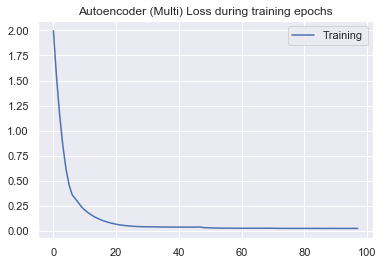

0.025676270488363045


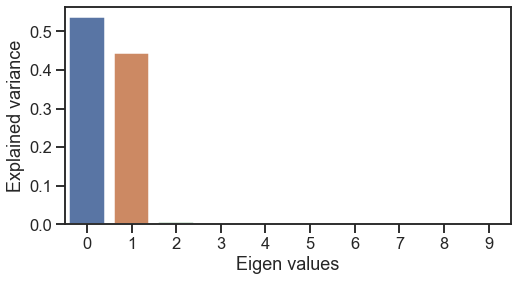

PCA on single-modal explained variance ratio: 0.9987465143203735


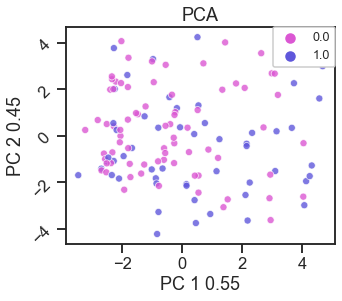

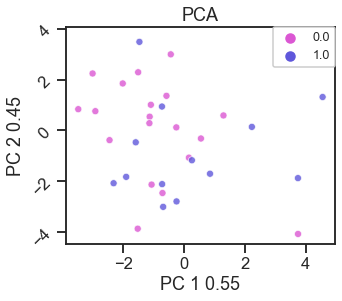

Results for AE: 

Best score for training data: 0.6307692307692306 

Best C: 0.08 



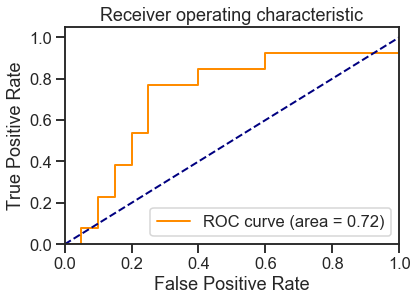

[[17  3]
 [ 9  4]]


              precision    recall  f1-score   support

           0       0.65      0.85      0.74        20
           1       0.57      0.31      0.40        13

    accuracy                           0.64        33
   macro avg       0.61      0.58      0.57        33
weighted avg       0.62      0.64      0.61        33

Training set score for Logistic Regression: 0.638462
Testing  set score for Logistic Regression: 0.636364
Best score for training data: 0.6384615384615384 

Best C: 1.0 

Best Gamma: 0.1 



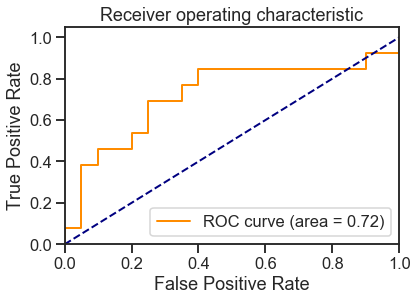

[[18  2]
 [ 8  5]]


              precision    recall  f1-score   support

           0       0.69      0.90      0.78        20
           1       0.71      0.38      0.50        13

    accuracy                           0.70        33
   macro avg       0.70      0.64      0.64        33
weighted avg       0.70      0.70      0.67        33

Training set score for SVM: 0.676923
Testing  set score for SVM: 0.696970
Best score for training data: 0.5538461538461539 

Best #estimators: 100 

Best max depth: 12 



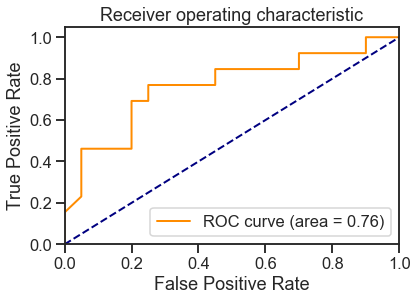

[[16  4]
 [ 7  6]]


              precision    recall  f1-score   support

           0       0.70      0.80      0.74        20
           1       0.60      0.46      0.52        13

    accuracy                           0.67        33
   macro avg       0.65      0.63      0.63        33
weighted avg       0.66      0.67      0.66        33

Training set score for RFC: 1.000000
Testing  set score for RFC: 0.666667
mutual information: 0.008472950804477913
AE 2 clusters -  silhoutte score: 0.39171892404556274
AE 3 clusters -  silhoutte score: 0.4025745391845703
AE 4 clusters -  silhoutte score: 0.3855316638946533
AE 5 clusters -  silhoutte score: 0.37403759360313416
AE 6 clusters -  silhoutte score: 0.400336891412735


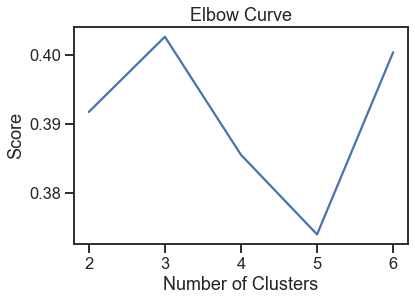

mutual information: 0.011256480707794734
AE 2 clusters -  silhoutte score: 0.3601994514465332
AE 3 clusters -  silhoutte score: 0.379544198513031
AE 4 clusters -  silhoutte score: 0.3275300860404968
AE 5 clusters -  silhoutte score: 0.3402295410633087
AE 6 clusters -  silhoutte score: 0.32246652245521545


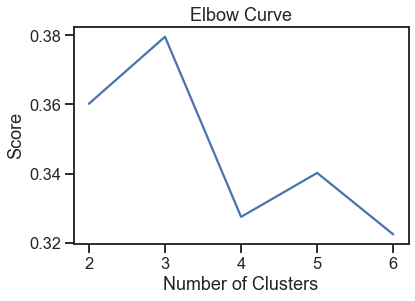

mutual information: 0.013381529455826355
AE 2 clusters -  silhoutte score: 0.30500683188438416
AE 3 clusters -  silhoutte score: 0.3531302809715271
AE 4 clusters -  silhoutte score: 0.32126107811927795
AE 5 clusters -  silhoutte score: 0.3226391077041626
AE 6 clusters -  silhoutte score: 0.35674411058425903


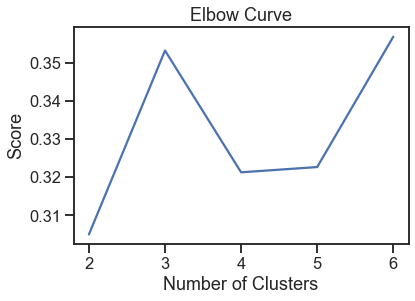

Compression: 70.58666666666667

Epoch 00044: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 00064: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.

Epoch 00075: ReduceLROnPlateau reducing learning rate to 1.0000000656873453e-06.

Epoch 00082: ReduceLROnPlateau reducing learning rate to 1.0000001111620805e-07.

Epoch 00087: ReduceLROnPlateau reducing learning rate to 1.000000082740371e-08.
Epoch 00087: early stopping


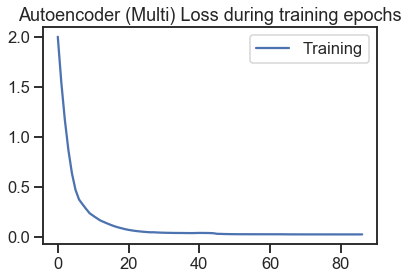

0.02640158780492269


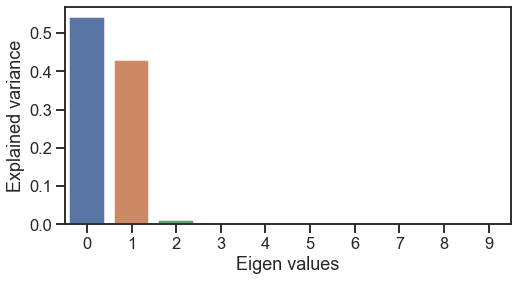

PCA on single-modal explained variance ratio: 0.9976698160171509


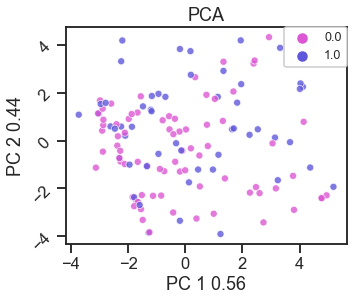

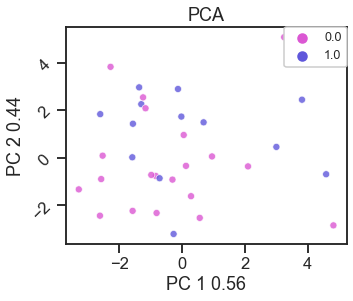

Results for AE: 

Best score for training data: 0.6461538461538462 

Best C: 0.08 



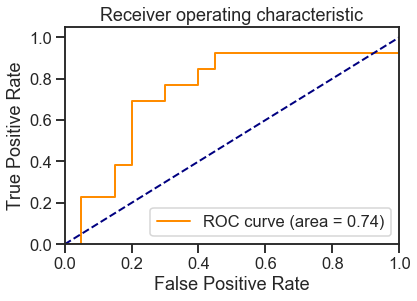

[[16  4]
 [ 7  6]]


              precision    recall  f1-score   support

           0       0.70      0.80      0.74        20
           1       0.60      0.46      0.52        13

    accuracy                           0.67        33
   macro avg       0.65      0.63      0.63        33
weighted avg       0.66      0.67      0.66        33

Training set score for Logistic Regression: 0.653846
Testing  set score for Logistic Regression: 0.666667
Best score for training data: 0.6 

Best C: 1.0 

Best Gamma: 0.1 



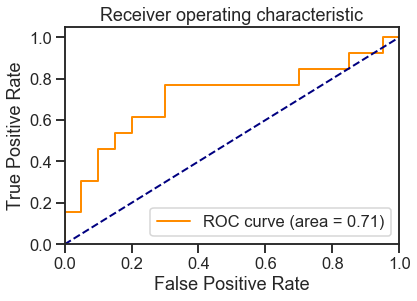

[[18  2]
 [ 7  6]]


              precision    recall  f1-score   support

           0       0.72      0.90      0.80        20
           1       0.75      0.46      0.57        13

    accuracy                           0.73        33
   macro avg       0.73      0.68      0.69        33
weighted avg       0.73      0.73      0.71        33

Training set score for SVM: 0.692308
Testing  set score for SVM: 0.727273
Best score for training data: 0.6076923076923076 

Best #estimators: 140 

Best max depth: None 



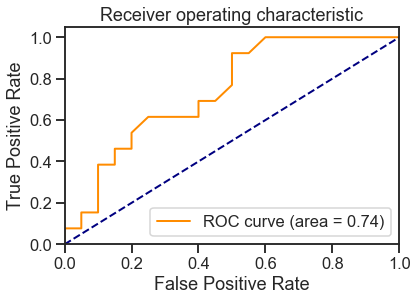

[[15  5]
 [ 5  8]]


              precision    recall  f1-score   support

           0       0.75      0.75      0.75        20
           1       0.62      0.62      0.62        13

    accuracy                           0.70        33
   macro avg       0.68      0.68      0.68        33
weighted avg       0.70      0.70      0.70        33

Training set score for RFC: 1.000000
Testing  set score for RFC: 0.696970
mutual information: 0.009236402779598868
AE 2 clusters -  silhoutte score: 0.39395132660865784
AE 3 clusters -  silhoutte score: 0.38707235455513
AE 4 clusters -  silhoutte score: 0.39710915088653564
AE 5 clusters -  silhoutte score: 0.4002726674079895
AE 6 clusters -  silhoutte score: 0.3549216389656067


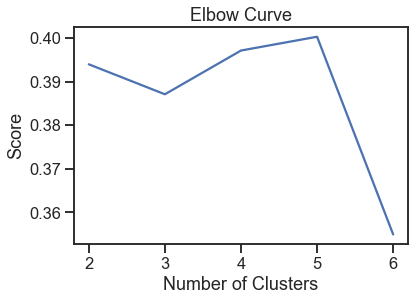

mutual information: 0.0004708893750349096
AE 2 clusters -  silhoutte score: 0.3956540822982788
AE 3 clusters -  silhoutte score: 0.3361952602863312
AE 4 clusters -  silhoutte score: 0.2698048949241638
AE 5 clusters -  silhoutte score: 0.3363349735736847
AE 6 clusters -  silhoutte score: 0.37874552607536316


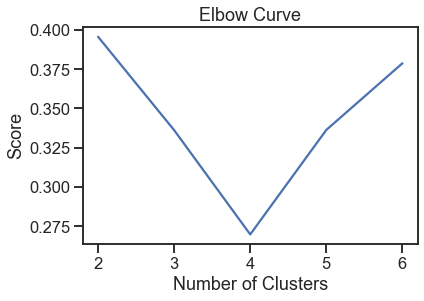

mutual information: 0.005742607921328814
AE 2 clusters -  silhoutte score: 0.39773017168045044
AE 3 clusters -  silhoutte score: 0.3928886353969574
AE 4 clusters -  silhoutte score: 0.36344993114471436
AE 5 clusters -  silhoutte score: 0.3577015697956085
AE 6 clusters -  silhoutte score: 0.3391377329826355


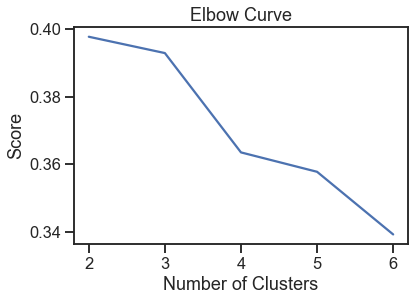

Compression: 70.58666666666667

Epoch 00056: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 00075: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.

Epoch 00086: ReduceLROnPlateau reducing learning rate to 1.0000000656873453e-06.

Epoch 00092: ReduceLROnPlateau reducing learning rate to 1.0000001111620805e-07.

Epoch 00100: ReduceLROnPlateau reducing learning rate to 1.000000082740371e-08.

Epoch 00105: ReduceLROnPlateau reducing learning rate to 1.000000082740371e-09.
Epoch 00106: early stopping


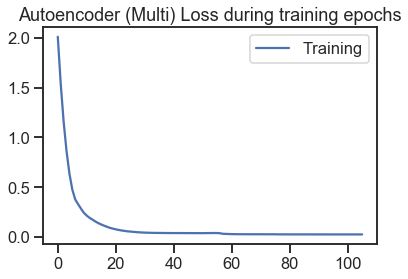

0.026202604031333558


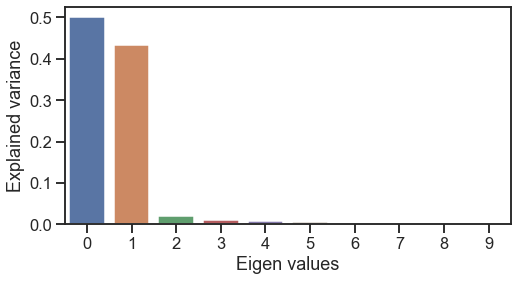

PCA on single-modal explained variance ratio: 0.9919449090957642


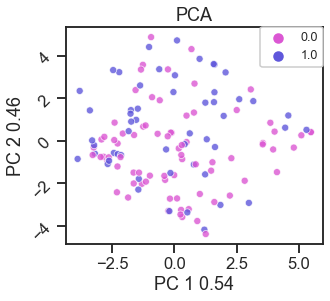

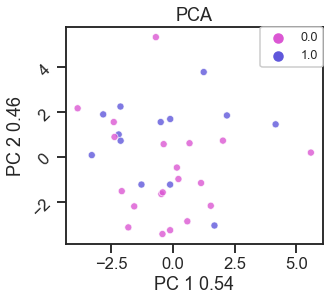

Results for AE: 

Best score for training data: 0.6461538461538462 

Best C: 0.08 



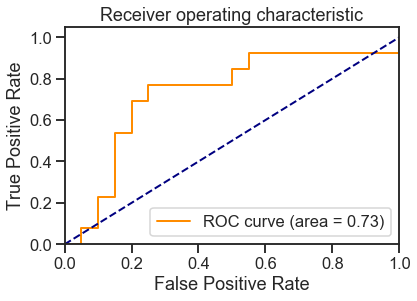

[[17  3]
 [10  3]]


              precision    recall  f1-score   support

           0       0.63      0.85      0.72        20
           1       0.50      0.23      0.32        13

    accuracy                           0.61        33
   macro avg       0.56      0.54      0.52        33
weighted avg       0.58      0.61      0.56        33

Training set score for Logistic Regression: 0.653846
Testing  set score for Logistic Regression: 0.606061
Best score for training data: 0.623076923076923 

Best C: 1.0 

Best Gamma: 0.1 



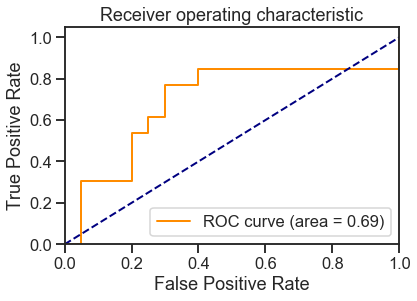

[[16  4]
 [ 9  4]]


              precision    recall  f1-score   support

           0       0.64      0.80      0.71        20
           1       0.50      0.31      0.38        13

    accuracy                           0.61        33
   macro avg       0.57      0.55      0.55        33
weighted avg       0.58      0.61      0.58        33

Training set score for SVM: 0.661538
Testing  set score for SVM: 0.606061
Best score for training data: 0.6076923076923078 

Best #estimators: 140 

Best max depth: None 



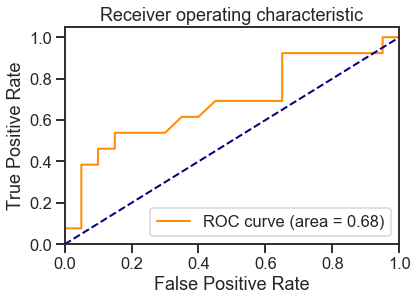

[[17  3]
 [ 6  7]]


              precision    recall  f1-score   support

           0       0.74      0.85      0.79        20
           1       0.70      0.54      0.61        13

    accuracy                           0.73        33
   macro avg       0.72      0.69      0.70        33
weighted avg       0.72      0.73      0.72        33

Training set score for RFC: 1.000000
Testing  set score for RFC: 0.727273
mutual information: 0.01540126835512924
AE 2 clusters -  silhoutte score: 0.3502398133277893
AE 3 clusters -  silhoutte score: 0.35354724526405334
AE 4 clusters -  silhoutte score: 0.3858599364757538
AE 5 clusters -  silhoutte score: 0.38922497630119324
AE 6 clusters -  silhoutte score: 0.3939308226108551


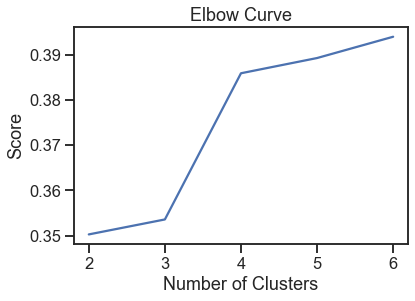

mutual information: 0.015360804741277696
AE 2 clusters -  silhoutte score: 0.339639276266098
AE 3 clusters -  silhoutte score: 0.28659647703170776
AE 4 clusters -  silhoutte score: 0.3357858955860138
AE 5 clusters -  silhoutte score: 0.3751024007797241
AE 6 clusters -  silhoutte score: 0.3851201832294464


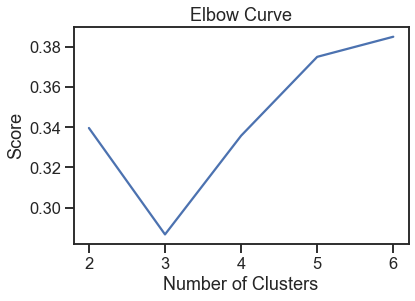

mutual information: 0.007748364592134046
AE 2 clusters -  silhoutte score: 0.3587070405483246
AE 3 clusters -  silhoutte score: 0.325603723526001
AE 4 clusters -  silhoutte score: 0.37901386618614197
AE 5 clusters -  silhoutte score: 0.3776504397392273
AE 6 clusters -  silhoutte score: 0.3833432197570801


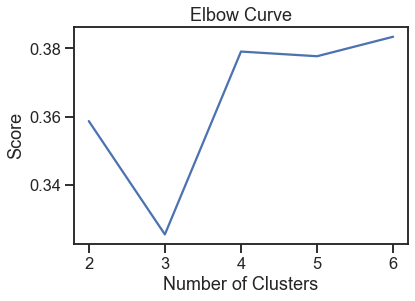

Compression: 70.58666666666667

Epoch 00069: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 00089: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.

Epoch 00101: ReduceLROnPlateau reducing learning rate to 1.0000000656873453e-06.

Epoch 00108: ReduceLROnPlateau reducing learning rate to 1.0000001111620805e-07.

Epoch 00113: ReduceLROnPlateau reducing learning rate to 1.000000082740371e-08.

Epoch 00118: ReduceLROnPlateau reducing learning rate to 1.000000082740371e-09.
Epoch 00118: early stopping


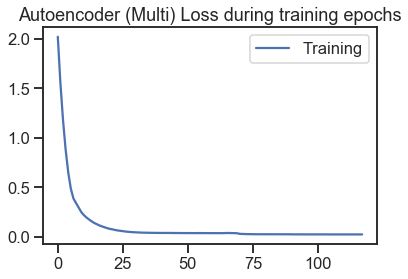

0.026482138295586294


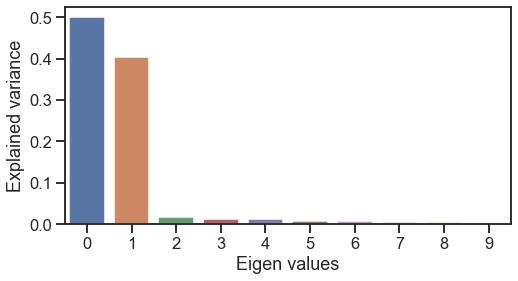

PCA on single-modal explained variance ratio: 0.9768581390380859


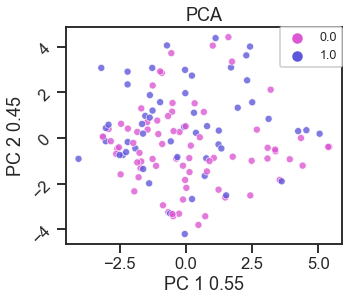

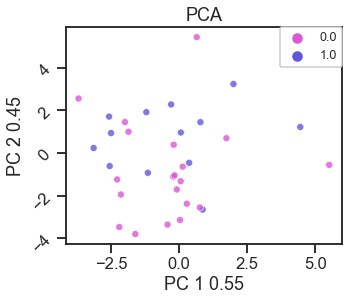

Results for AE: 

Best score for training data: 0.6461538461538461 

Best C: 0.08 



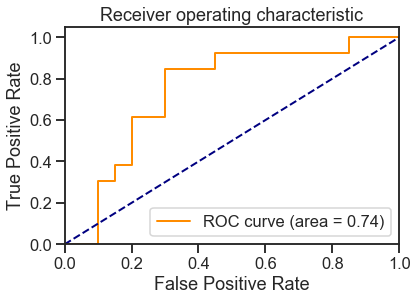

[[17  3]
 [ 8  5]]


              precision    recall  f1-score   support

           0       0.68      0.85      0.76        20
           1       0.62      0.38      0.48        13

    accuracy                           0.67        33
   macro avg       0.65      0.62      0.62        33
weighted avg       0.66      0.67      0.65        33

Training set score for Logistic Regression: 0.661538
Testing  set score for Logistic Regression: 0.666667
Best score for training data: 0.6 

Best C: 1.0 

Best Gamma: 0.1 



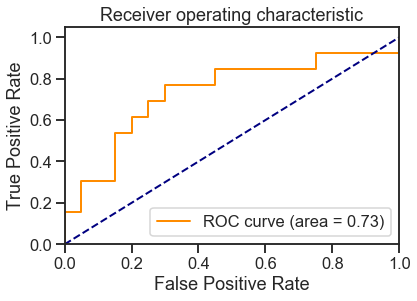

[[17  3]
 [ 7  6]]


              precision    recall  f1-score   support

           0       0.71      0.85      0.77        20
           1       0.67      0.46      0.55        13

    accuracy                           0.70        33
   macro avg       0.69      0.66      0.66        33
weighted avg       0.69      0.70      0.68        33

Training set score for SVM: 0.676923
Testing  set score for SVM: 0.696970
Best score for training data: 0.6307692307692306 

Best #estimators: 100 

Best max depth: 12 



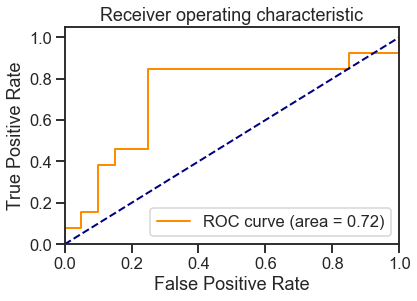

[[15  5]
 [ 5  8]]


              precision    recall  f1-score   support

           0       0.75      0.75      0.75        20
           1       0.62      0.62      0.62        13

    accuracy                           0.70        33
   macro avg       0.68      0.68      0.68        33
weighted avg       0.70      0.70      0.70        33

Training set score for RFC: 1.000000
Testing  set score for RFC: 0.696970
mutual information: 0.0010931475969831602
AE 2 clusters -  silhoutte score: 0.3442368805408478
AE 3 clusters -  silhoutte score: 0.32338088750839233
AE 4 clusters -  silhoutte score: 0.3466167151927948
AE 5 clusters -  silhoutte score: 0.33665895462036133
AE 6 clusters -  silhoutte score: 0.35182449221611023


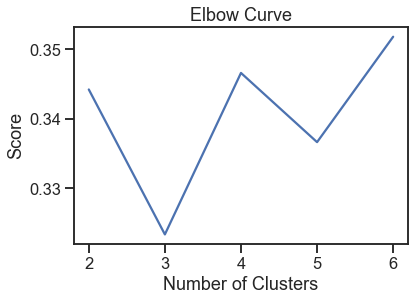

mutual information: 0.010846335310801002
AE 2 clusters -  silhoutte score: 0.34819769859313965
AE 3 clusters -  silhoutte score: 0.32813921570777893
AE 4 clusters -  silhoutte score: 0.26498961448669434
AE 5 clusters -  silhoutte score: 0.2698638439178467
AE 6 clusters -  silhoutte score: 0.3150911331176758


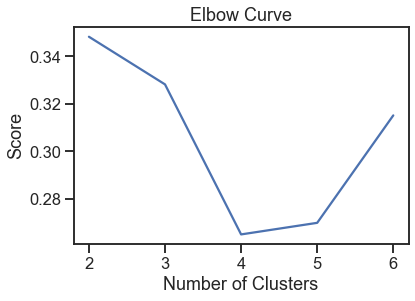

mutual information: 0.0004125173008430443
AE 2 clusters -  silhoutte score: 0.3804863691329956
AE 3 clusters -  silhoutte score: 0.31936806440353394
AE 4 clusters -  silhoutte score: 0.3048661947250366
AE 5 clusters -  silhoutte score: 0.3323289752006531
AE 6 clusters -  silhoutte score: 0.33766284584999084


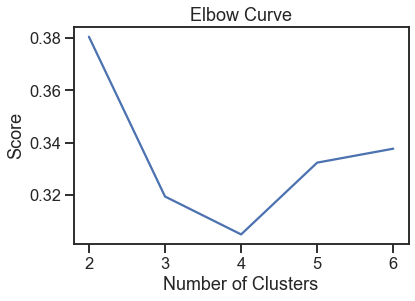

Compression: 70.58666666666667

Epoch 00062: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 00083: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.

Epoch 00095: ReduceLROnPlateau reducing learning rate to 1.0000000656873453e-06.

Epoch 00105: ReduceLROnPlateau reducing learning rate to 1.0000001111620805e-07.

Epoch 00110: ReduceLROnPlateau reducing learning rate to 1.000000082740371e-08.
Epoch 00110: early stopping


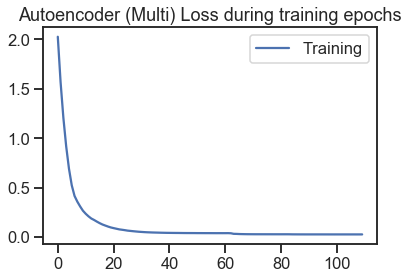

0.027007921928396593


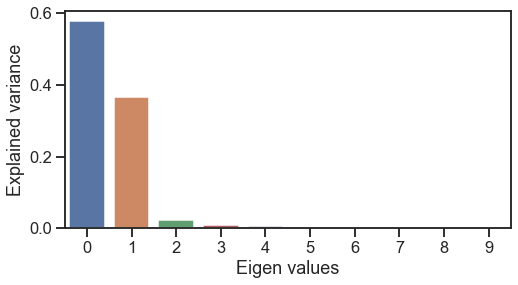

PCA on single-modal explained variance ratio: 0.9939956068992615


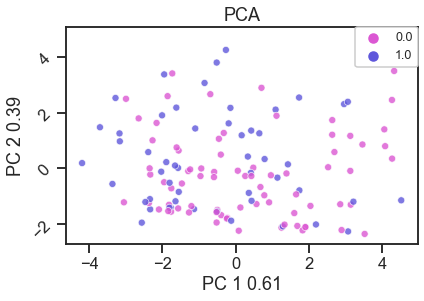

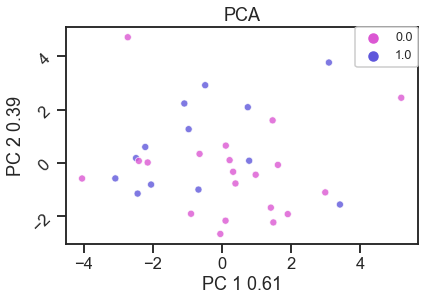

Results for AE: 

Best score for training data: 0.6384615384615383 

Best C: 0.08 



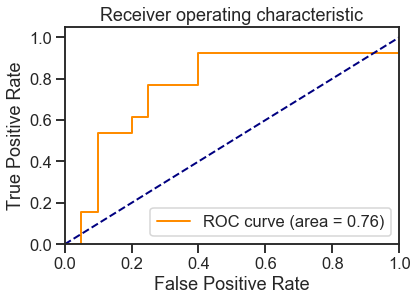

[[16  4]
 [ 5  8]]


              precision    recall  f1-score   support

           0       0.76      0.80      0.78        20
           1       0.67      0.62      0.64        13

    accuracy                           0.73        33
   macro avg       0.71      0.71      0.71        33
weighted avg       0.72      0.73      0.73        33

Training set score for Logistic Regression: 0.646154
Testing  set score for Logistic Regression: 0.727273
Best score for training data: 0.623076923076923 

Best C: 1.0 

Best Gamma: 0.1 



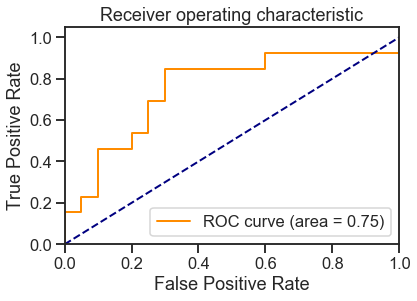

[[16  4]
 [ 6  7]]


              precision    recall  f1-score   support

           0       0.73      0.80      0.76        20
           1       0.64      0.54      0.58        13

    accuracy                           0.70        33
   macro avg       0.68      0.67      0.67        33
weighted avg       0.69      0.70      0.69        33

Training set score for SVM: 0.692308
Testing  set score for SVM: 0.696970
Best score for training data: 0.6 

Best #estimators: 100 

Best max depth: 12 



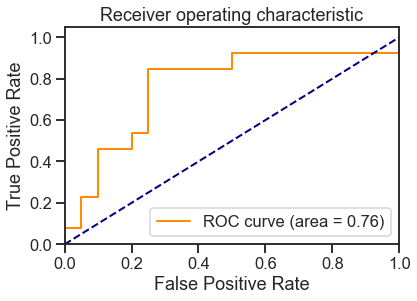

[[16  4]
 [ 6  7]]


              precision    recall  f1-score   support

           0       0.73      0.80      0.76        20
           1       0.64      0.54      0.58        13

    accuracy                           0.70        33
   macro avg       0.68      0.67      0.67        33
weighted avg       0.69      0.70      0.69        33

Training set score for RFC: 1.000000
Testing  set score for RFC: 0.696970
mutual information: 0.005918408136657269
AE 2 clusters -  silhoutte score: 0.35874712467193604
AE 3 clusters -  silhoutte score: 0.3570302426815033
AE 4 clusters -  silhoutte score: 0.3687795102596283
AE 5 clusters -  silhoutte score: 0.3394870162010193
AE 6 clusters -  silhoutte score: 0.3434447646141052


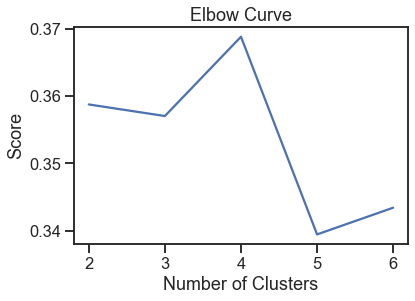

mutual information: 0.007815267444690906
AE 2 clusters -  silhoutte score: 0.37112438678741455
AE 3 clusters -  silhoutte score: 0.32656121253967285
AE 4 clusters -  silhoutte score: 0.32783761620521545
AE 5 clusters -  silhoutte score: 0.3535207211971283
AE 6 clusters -  silhoutte score: 0.32727110385894775


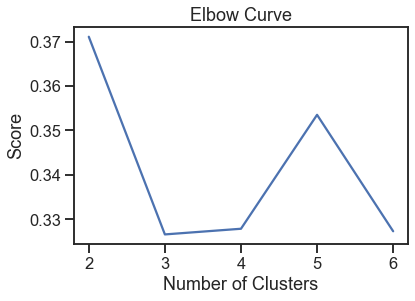

mutual information: 0.03235891996545215
AE 2 clusters -  silhoutte score: 0.3368058204650879
AE 3 clusters -  silhoutte score: 0.33747598528862
AE 4 clusters -  silhoutte score: 0.3596729040145874
AE 5 clusters -  silhoutte score: 0.3277510106563568
AE 6 clusters -  silhoutte score: 0.3341293931007385


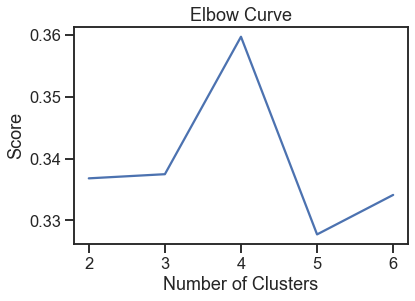

Compression: 70.58666666666667

Epoch 00070: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 00087: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.

Epoch 00100: ReduceLROnPlateau reducing learning rate to 1.0000000656873453e-06.

Epoch 00109: ReduceLROnPlateau reducing learning rate to 1.0000001111620805e-07.

Epoch 00114: ReduceLROnPlateau reducing learning rate to 1.000000082740371e-08.

Epoch 00119: ReduceLROnPlateau reducing learning rate to 1.000000082740371e-09.

Epoch 00124: ReduceLROnPlateau reducing learning rate to 1.000000082740371e-10.
Epoch 00124: early stopping


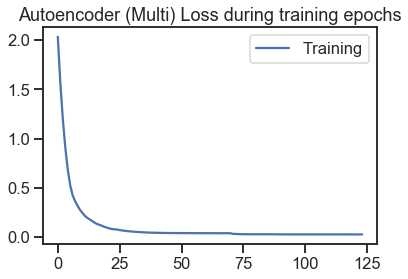

0.027541130781173706


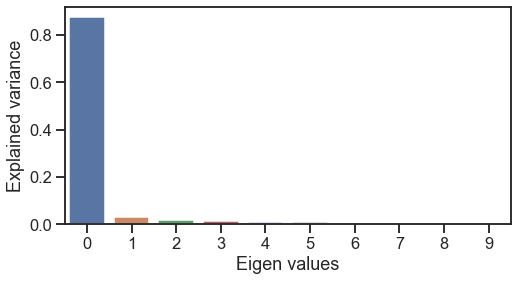

PCA on single-modal explained variance ratio: 0.9790520668029785


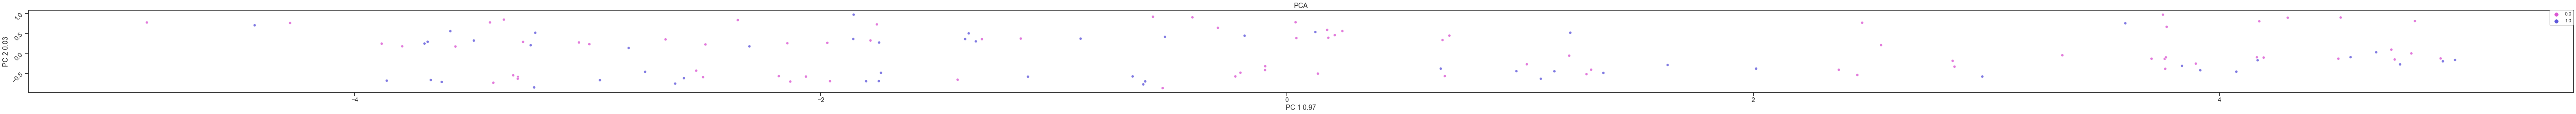

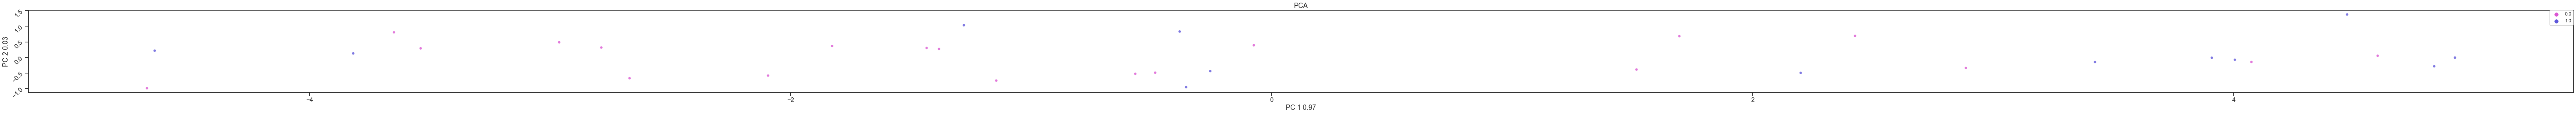

Results for AE: 

Best score for training data: 0.5692307692307692 

Best C: 0.08 



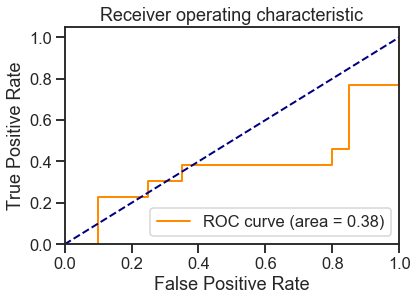

[[19  1]
 [13  0]]


              precision    recall  f1-score   support

           0       0.59      0.95      0.73        20
           1       0.00      0.00      0.00        13

    accuracy                           0.58        33
   macro avg       0.30      0.47      0.37        33
weighted avg       0.36      0.58      0.44        33

Training set score for Logistic Regression: 0.615385
Testing  set score for Logistic Regression: 0.575758
Best score for training data: 0.5923076923076923 

Best C: 0.1 

Best Gamma: scale 



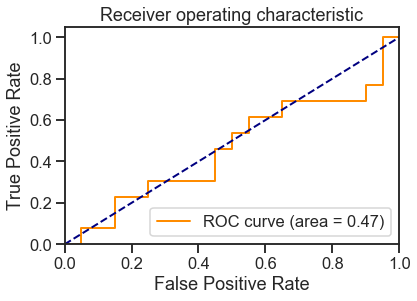

[[20  0]
 [13  0]]


              precision    recall  f1-score   support

           0       0.61      1.00      0.75        20
           1       0.00      0.00      0.00        13

    accuracy                           0.61        33
   macro avg       0.30      0.50      0.38        33
weighted avg       0.37      0.61      0.46        33

Training set score for SVM: 0.592308
Testing  set score for SVM: 0.606061


C:\Users\Tomas\Anaconda3\envs\tensorflow_2\lib\site-packages\sklearn\metrics\_classification.py:1268: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Best score for training data: 0.6 

Best #estimators: 140 

Best max depth: None 



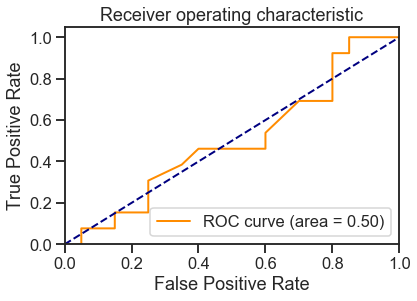

[[15  5]
 [ 9  4]]


              precision    recall  f1-score   support

           0       0.62      0.75      0.68        20
           1       0.44      0.31      0.36        13

    accuracy                           0.58        33
   macro avg       0.53      0.53      0.52        33
weighted avg       0.55      0.58      0.56        33

Training set score for RFC: 1.000000
Testing  set score for RFC: 0.575758
mutual information: 0.002463106111419008
AE 2 clusters -  silhoutte score: 0.5343995094299316
AE 3 clusters -  silhoutte score: 0.4723473787307739
AE 4 clusters -  silhoutte score: 0.38039883971214294
AE 5 clusters -  silhoutte score: 0.3251112699508667
AE 6 clusters -  silhoutte score: 0.28296181559562683


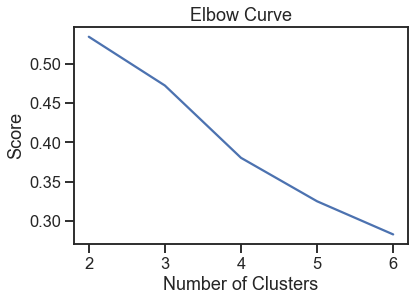

mutual information: 0.01336872093310503
AE 2 clusters -  silhoutte score: 0.5455967783927917
AE 3 clusters -  silhoutte score: 0.4755817949771881
AE 4 clusters -  silhoutte score: 0.4062995910644531
AE 5 clusters -  silhoutte score: 0.3289605379104614
AE 6 clusters -  silhoutte score: 0.3024697005748749


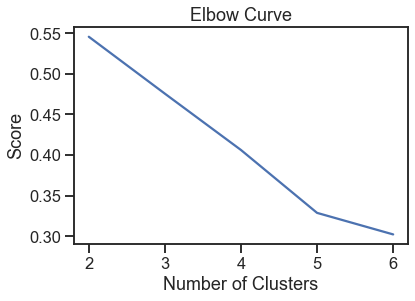

mutual information: 0.005819409382848057
AE 2 clusters -  silhoutte score: 0.5490285754203796
AE 3 clusters -  silhoutte score: 0.4669654369354248
AE 4 clusters -  silhoutte score: 0.3608803153038025
AE 5 clusters -  silhoutte score: 0.30046558380126953
AE 6 clusters -  silhoutte score: 0.29106569290161133


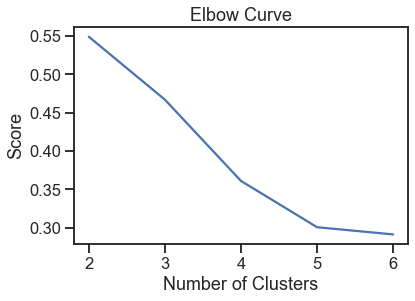

Compression: 70.58666666666667

Epoch 00084: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 00103: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.

Epoch 00113: ReduceLROnPlateau reducing learning rate to 1.0000000656873453e-06.

Epoch 00119: ReduceLROnPlateau reducing learning rate to 1.0000001111620805e-07.

Epoch 00125: ReduceLROnPlateau reducing learning rate to 1.000000082740371e-08.

Epoch 00130: ReduceLROnPlateau reducing learning rate to 1.000000082740371e-09.
Epoch 00130: early stopping


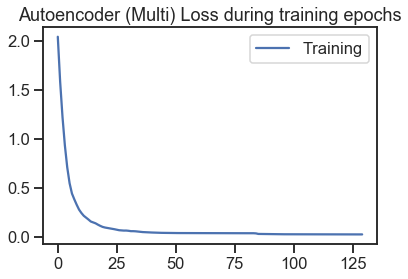

0.0272241663474303


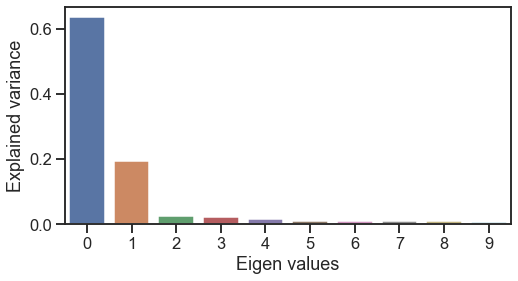

PCA on single-modal explained variance ratio: 0.9400778412818909


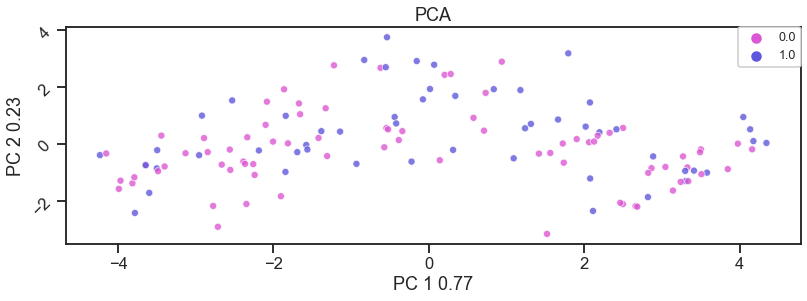

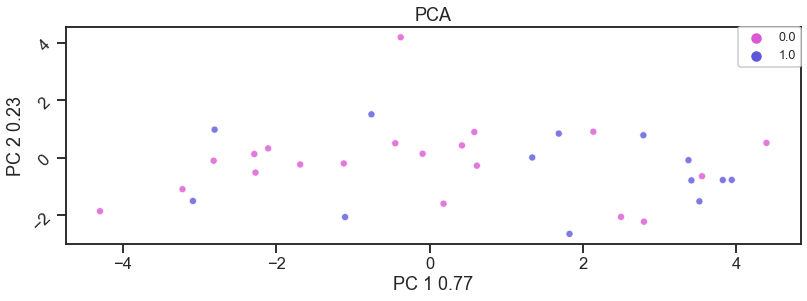

Results for AE: 

Best score for training data: 0.623076923076923 

Best C: 0.08 



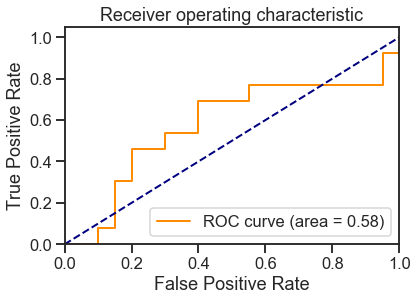

[[17  3]
 [11  2]]


              precision    recall  f1-score   support

           0       0.61      0.85      0.71        20
           1       0.40      0.15      0.22        13

    accuracy                           0.58        33
   macro avg       0.50      0.50      0.47        33
weighted avg       0.53      0.58      0.52        33

Training set score for Logistic Regression: 0.676923
Testing  set score for Logistic Regression: 0.575758
Best score for training data: 0.5923076923076923 

Best C: 0.1 

Best Gamma: scale 



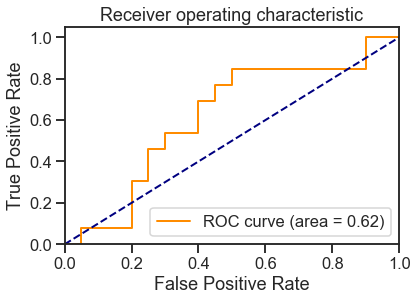

[[20  0]
 [13  0]]


              precision    recall  f1-score   support

           0       0.61      1.00      0.75        20
           1       0.00      0.00      0.00        13

    accuracy                           0.61        33
   macro avg       0.30      0.50      0.38        33
weighted avg       0.37      0.61      0.46        33

Training set score for SVM: 0.592308
Testing  set score for SVM: 0.606061


C:\Users\Tomas\Anaconda3\envs\tensorflow_2\lib\site-packages\sklearn\metrics\_classification.py:1268: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Best score for training data: 0.5461538461538462 

Best #estimators: 100 

Best max depth: 12 



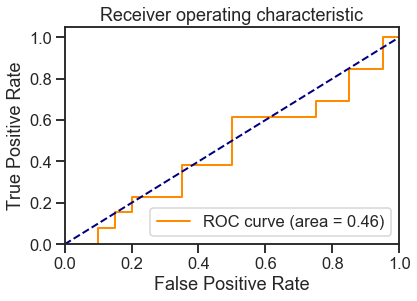

[[15  5]
 [10  3]]


              precision    recall  f1-score   support

           0       0.60      0.75      0.67        20
           1       0.38      0.23      0.29        13

    accuracy                           0.55        33
   macro avg       0.49      0.49      0.48        33
weighted avg       0.51      0.55      0.52        33

Training set score for RFC: 1.000000
Testing  set score for RFC: 0.545455
mutual information: 0.0004236380756743644
AE 2 clusters -  silhoutte score: 0.41749173402786255
AE 3 clusters -  silhoutte score: 0.36435312032699585
AE 4 clusters -  silhoutte score: 0.33302512764930725
AE 5 clusters -  silhoutte score: 0.2869880199432373
AE 6 clusters -  silhoutte score: 0.27179640531539917


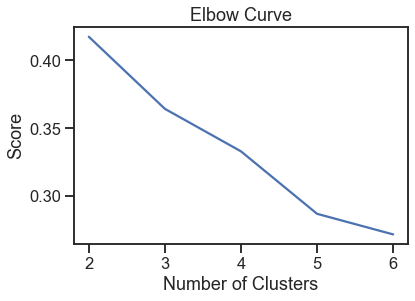

mutual information: 0.0017073512009030257
AE 2 clusters -  silhoutte score: 0.41402745246887207
AE 3 clusters -  silhoutte score: 0.38979268074035645
AE 4 clusters -  silhoutte score: 0.34438228607177734
AE 5 clusters -  silhoutte score: 0.292876273393631
AE 6 clusters -  silhoutte score: 0.2796817421913147


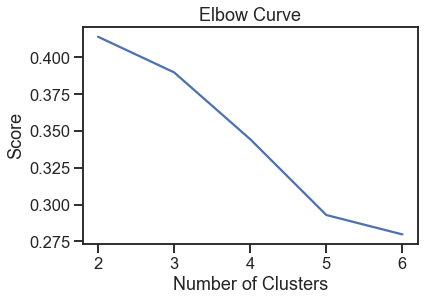

mutual information: 0.00011418341790197182
AE 2 clusters -  silhoutte score: 0.41307589411735535
AE 3 clusters -  silhoutte score: 0.3866988718509674
AE 4 clusters -  silhoutte score: 0.340756356716156
AE 5 clusters -  silhoutte score: 0.278421014547348
AE 6 clusters -  silhoutte score: 0.26504409313201904


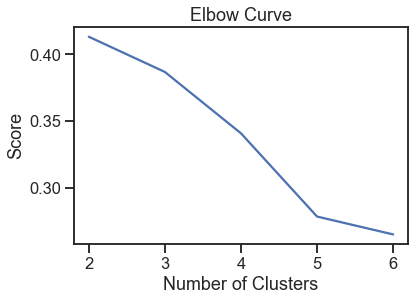

Compression: 70.58666666666667

Epoch 00080: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 00098: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.

Epoch 00114: ReduceLROnPlateau reducing learning rate to 1.0000000656873453e-06.

Epoch 00119: ReduceLROnPlateau reducing learning rate to 1.0000001111620805e-07.

Epoch 00127: ReduceLROnPlateau reducing learning rate to 1.000000082740371e-08.

Epoch 00132: ReduceLROnPlateau reducing learning rate to 1.000000082740371e-09.
Epoch 00132: early stopping


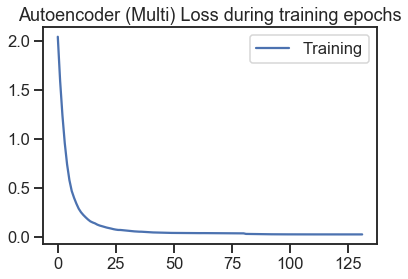

0.027376904281286092


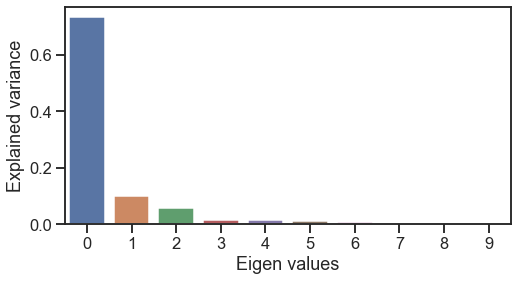

PCA on single-modal explained variance ratio: 0.9599360823631287


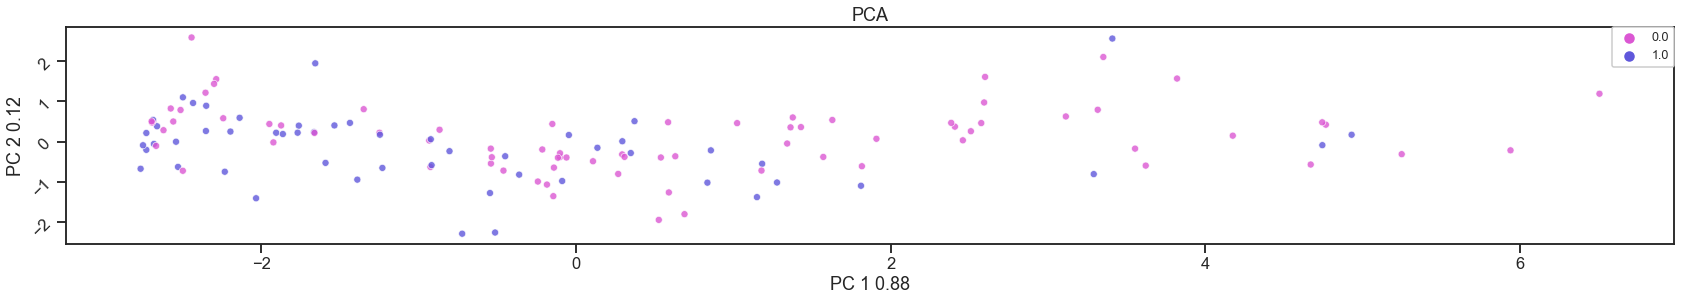

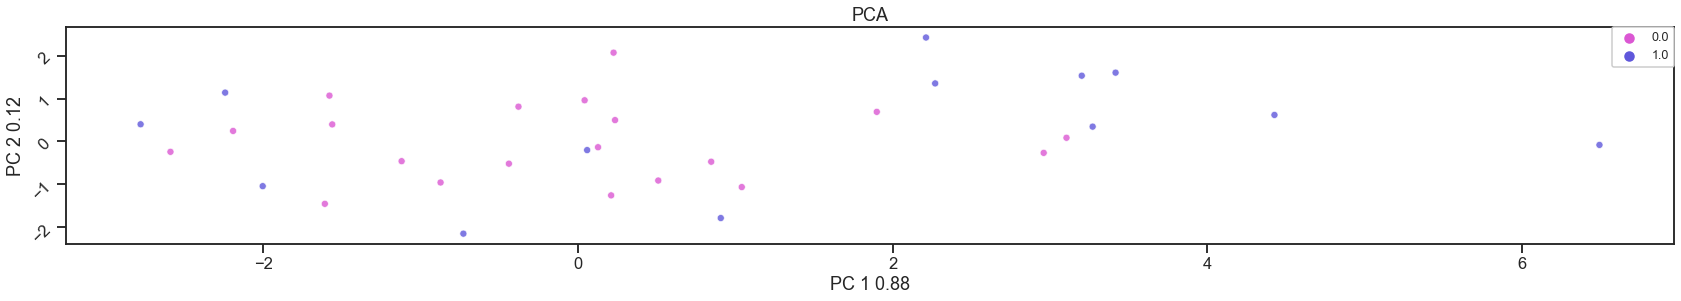

Results for AE: 

Best score for training data: 0.6769230769230768 

Best C: 0.08 



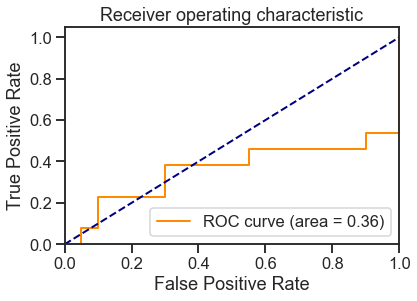

[[15  5]
 [10  3]]


              precision    recall  f1-score   support

           0       0.60      0.75      0.67        20
           1       0.38      0.23      0.29        13

    accuracy                           0.55        33
   macro avg       0.49      0.49      0.48        33
weighted avg       0.51      0.55      0.52        33

Training set score for Logistic Regression: 0.692308
Testing  set score for Logistic Regression: 0.545455
Best score for training data: 0.6307692307692307 

Best C: 1.0 

Best Gamma: 0.1 



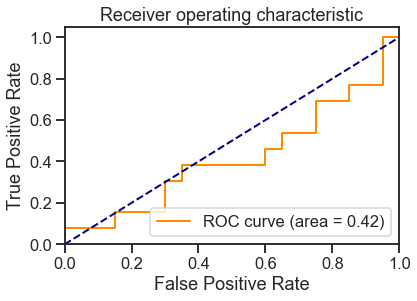

[[14  6]
 [11  2]]


              precision    recall  f1-score   support

           0       0.56      0.70      0.62        20
           1       0.25      0.15      0.19        13

    accuracy                           0.48        33
   macro avg       0.41      0.43      0.41        33
weighted avg       0.44      0.48      0.45        33

Training set score for SVM: 0.684615
Testing  set score for SVM: 0.484848
Best score for training data: 0.5923076923076922 

Best #estimators: 140 

Best max depth: None 



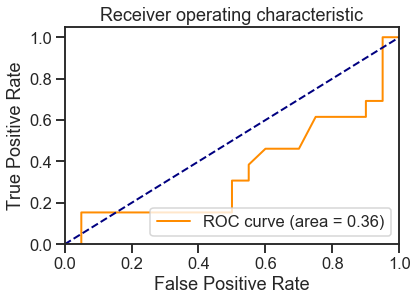

[[10 10]
 [ 9  4]]


              precision    recall  f1-score   support

           0       0.53      0.50      0.51        20
           1       0.29      0.31      0.30        13

    accuracy                           0.42        33
   macro avg       0.41      0.40      0.40        33
weighted avg       0.43      0.42      0.43        33

Training set score for RFC: 1.000000
Testing  set score for RFC: 0.424242
mutual information: 0.054995305639563584
AE 2 clusters -  silhoutte score: 0.4513823688030243
AE 3 clusters -  silhoutte score: 0.42935991287231445
AE 4 clusters -  silhoutte score: 0.36218002438545227
AE 5 clusters -  silhoutte score: 0.3468403220176697
AE 6 clusters -  silhoutte score: 0.27575936913490295


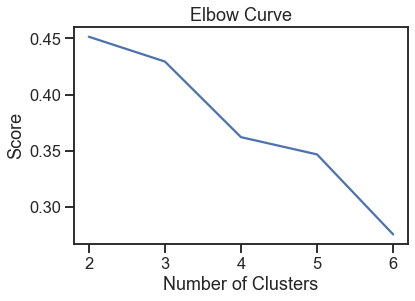

mutual information: 0.051926232180400184
AE 2 clusters -  silhoutte score: 0.49617239832878113
AE 3 clusters -  silhoutte score: 0.41092509031295776
AE 4 clusters -  silhoutte score: 0.4068669378757477
AE 5 clusters -  silhoutte score: 0.3945668637752533
AE 6 clusters -  silhoutte score: 0.3833027780056


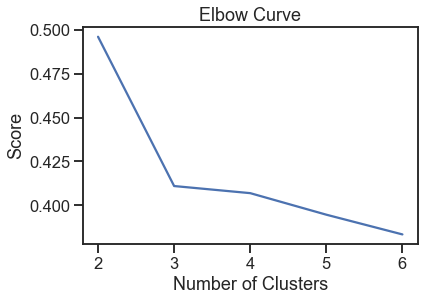

mutual information: 0.051926232180400184
AE 2 clusters -  silhoutte score: 0.49617239832878113
AE 3 clusters -  silhoutte score: 0.42699989676475525
AE 4 clusters -  silhoutte score: 0.40859663486480713
AE 5 clusters -  silhoutte score: 0.3454228341579437
AE 6 clusters -  silhoutte score: 0.2616862654685974


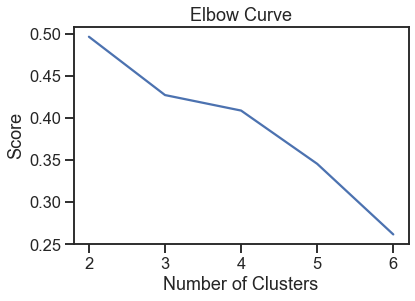

Compression: 70.58666666666667

Epoch 00096: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 00118: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.

Epoch 00129: ReduceLROnPlateau reducing learning rate to 1.0000000656873453e-06.

Epoch 00137: ReduceLROnPlateau reducing learning rate to 1.0000001111620805e-07.

Epoch 00142: ReduceLROnPlateau reducing learning rate to 1.000000082740371e-08.
Epoch 00142: early stopping


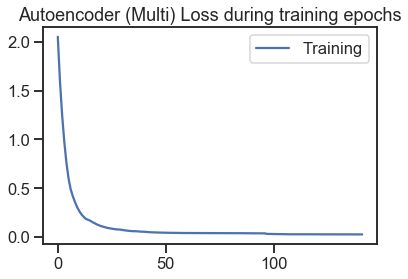

0.026128088396329147


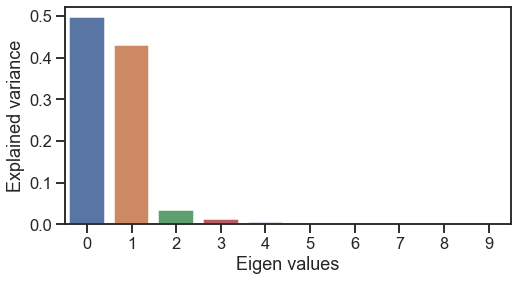

PCA on single-modal explained variance ratio: 0.9934220314025879


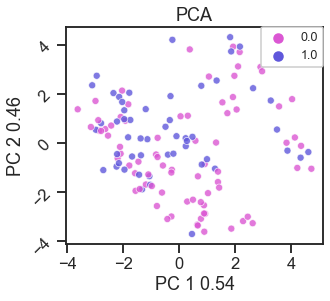

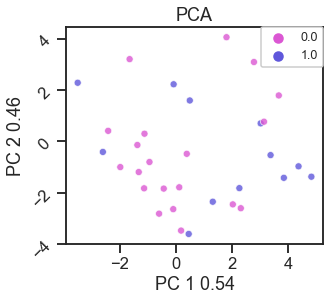

Results for AE: 

Best score for training data: 0.6153846153846153 

Best C: 0.08 



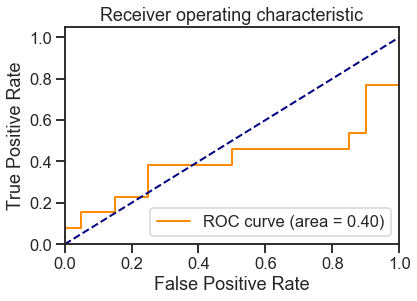

[[16  4]
 [10  3]]


              precision    recall  f1-score   support

           0       0.62      0.80      0.70        20
           1       0.43      0.23      0.30        13

    accuracy                           0.58        33
   macro avg       0.52      0.52      0.50        33
weighted avg       0.54      0.58      0.54        33

Training set score for Logistic Regression: 0.623077
Testing  set score for Logistic Regression: 0.575758
Best score for training data: 0.6230769230769231 

Best C: 1.0 

Best Gamma: 0.1 



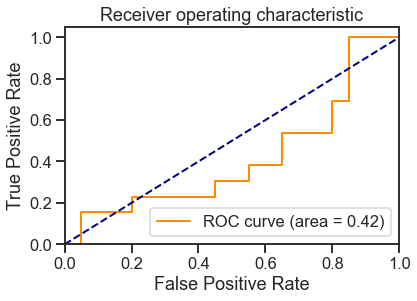

[[16  4]
 [11  2]]


              precision    recall  f1-score   support

           0       0.59      0.80      0.68        20
           1       0.33      0.15      0.21        13

    accuracy                           0.55        33
   macro avg       0.46      0.48      0.45        33
weighted avg       0.49      0.55      0.50        33

Training set score for SVM: 0.707692
Testing  set score for SVM: 0.545455
Best score for training data: 0.5923076923076922 

Best #estimators: 140 

Best max depth: None 



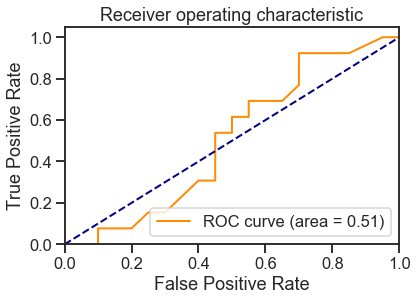

[[14  6]
 [11  2]]


              precision    recall  f1-score   support

           0       0.56      0.70      0.62        20
           1       0.25      0.15      0.19        13

    accuracy                           0.48        33
   macro avg       0.41      0.43      0.41        33
weighted avg       0.44      0.48      0.45        33

Training set score for RFC: 1.000000
Testing  set score for RFC: 0.484848
mutual information: 0.00045063599870930857
AE 2 clusters -  silhoutte score: 0.42007219791412354
AE 3 clusters -  silhoutte score: 0.37577641010284424
AE 4 clusters -  silhoutte score: 0.3857124149799347
AE 5 clusters -  silhoutte score: 0.3630027174949646
AE 6 clusters -  silhoutte score: 0.3765855133533478


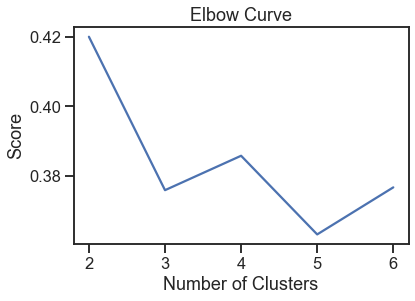

mutual information: 3.440551380053688e-05
AE 2 clusters -  silhoutte score: 0.32703062891960144
AE 3 clusters -  silhoutte score: 0.37434110045433044
AE 4 clusters -  silhoutte score: 0.3932112157344818
AE 5 clusters -  silhoutte score: 0.3555823266506195
AE 6 clusters -  silhoutte score: 0.3320912718772888


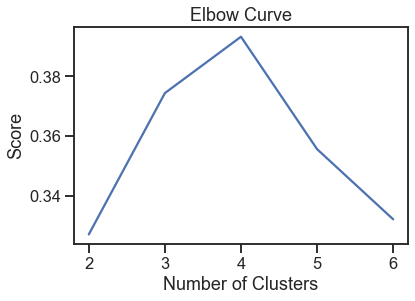

mutual information: 0.00045063599870930857
AE 2 clusters -  silhoutte score: 0.42007219791412354
AE 3 clusters -  silhoutte score: 0.3435581922531128
AE 4 clusters -  silhoutte score: 0.32349589467048645
AE 5 clusters -  silhoutte score: 0.3511759340763092
AE 6 clusters -  silhoutte score: 0.3698582947254181


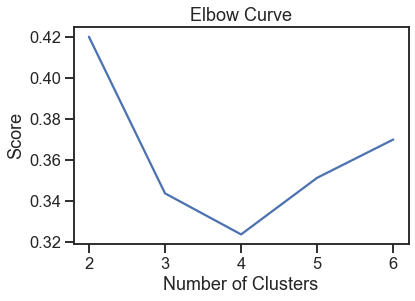

Compression: 70.58666666666667

Epoch 00086: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 00104: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.

Epoch 00116: ReduceLROnPlateau reducing learning rate to 1.0000000656873453e-06.

Epoch 00124: ReduceLROnPlateau reducing learning rate to 1.0000001111620805e-07.

Epoch 00129: ReduceLROnPlateau reducing learning rate to 1.000000082740371e-08.
Epoch 00129: early stopping


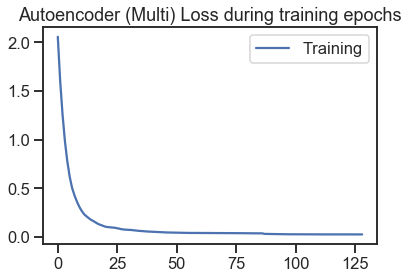

0.026557905914691777


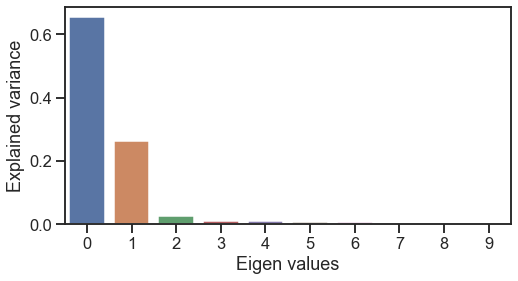

PCA on single-modal explained variance ratio: 0.9901926517486572


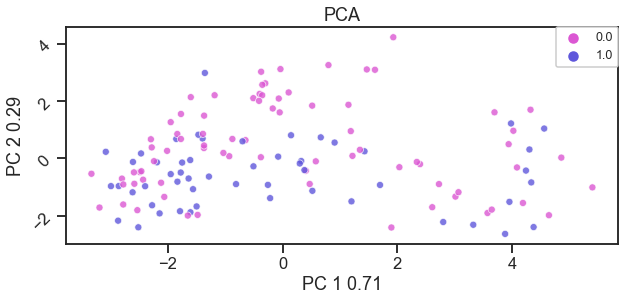

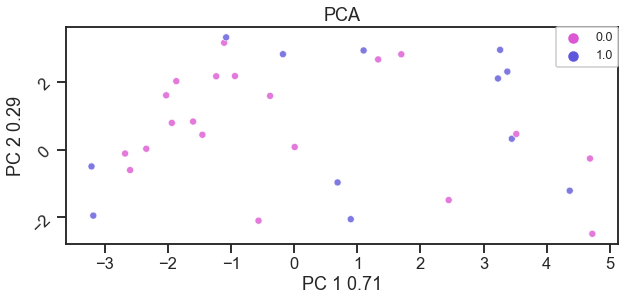

Results for AE: 

Best score for training data: 0.6692307692307693 

Best C: 0.08 



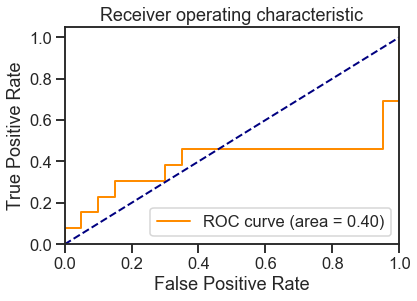

[[16  4]
 [ 9  4]]


              precision    recall  f1-score   support

           0       0.64      0.80      0.71        20
           1       0.50      0.31      0.38        13

    accuracy                           0.61        33
   macro avg       0.57      0.55      0.55        33
weighted avg       0.58      0.61      0.58        33

Training set score for Logistic Regression: 0.684615
Testing  set score for Logistic Regression: 0.606061
Best score for training data: 0.6307692307692307 

Best C: 1.0 

Best Gamma: 0.1 



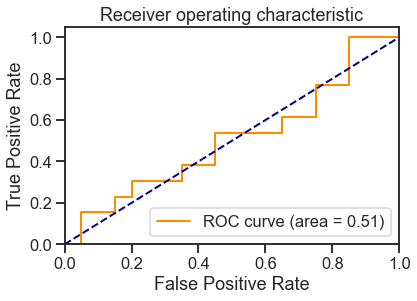

[[17  3]
 [11  2]]


              precision    recall  f1-score   support

           0       0.61      0.85      0.71        20
           1       0.40      0.15      0.22        13

    accuracy                           0.58        33
   macro avg       0.50      0.50      0.47        33
weighted avg       0.53      0.58      0.52        33

Training set score for SVM: 0.730769
Testing  set score for SVM: 0.575758
Best score for training data: 0.6538461538461539 

Best #estimators: 140 

Best max depth: None 



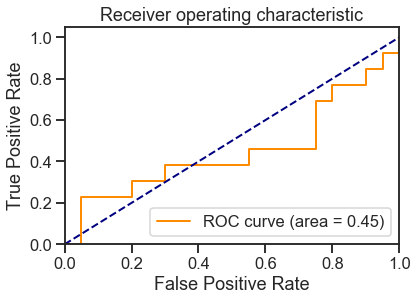

[[17  3]
 [10  3]]


              precision    recall  f1-score   support

           0       0.63      0.85      0.72        20
           1       0.50      0.23      0.32        13

    accuracy                           0.61        33
   macro avg       0.56      0.54      0.52        33
weighted avg       0.58      0.61      0.56        33

Training set score for RFC: 1.000000
Testing  set score for RFC: 0.606061
mutual information: 0.007735004880382257
AE 2 clusters -  silhoutte score: 0.45626354217529297
AE 3 clusters -  silhoutte score: 0.3867754340171814
AE 4 clusters -  silhoutte score: 0.3659602999687195
AE 5 clusters -  silhoutte score: 0.3196692168712616
AE 6 clusters -  silhoutte score: 0.3270028531551361


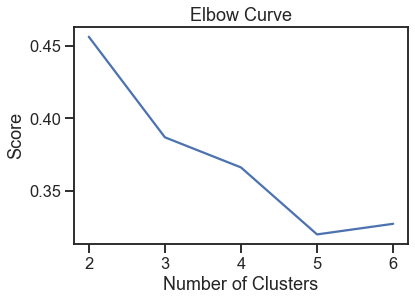

mutual information: 0.0004708893750349096
AE 2 clusters -  silhoutte score: 0.4712539613246918
AE 3 clusters -  silhoutte score: 0.36837050318717957
AE 4 clusters -  silhoutte score: 0.35240957140922546
AE 5 clusters -  silhoutte score: 0.3809111416339874
AE 6 clusters -  silhoutte score: 0.3621337115764618


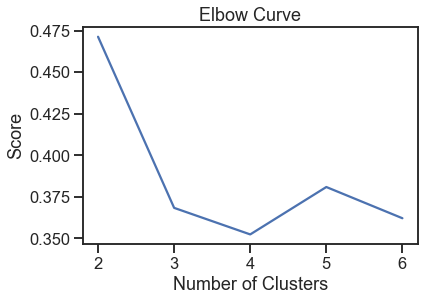

mutual information: 5.0131936389266404e-05
AE 2 clusters -  silhoutte score: 0.4655500054359436
AE 3 clusters -  silhoutte score: 0.3579106330871582
AE 4 clusters -  silhoutte score: 0.3675207793712616
AE 5 clusters -  silhoutte score: 0.3023226261138916
AE 6 clusters -  silhoutte score: 0.30609846115112305


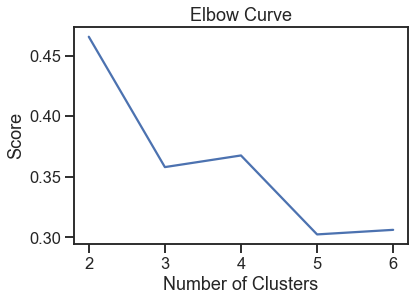

Compression: 70.58666666666667

Epoch 00100: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 00117: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.

Epoch 00131: ReduceLROnPlateau reducing learning rate to 1.0000000656873453e-06.

Epoch 00136: ReduceLROnPlateau reducing learning rate to 1.0000001111620805e-07.

Epoch 00146: ReduceLROnPlateau reducing learning rate to 1.000000082740371e-08.

Epoch 00151: ReduceLROnPlateau reducing learning rate to 1.000000082740371e-09.
Epoch 00151: early stopping


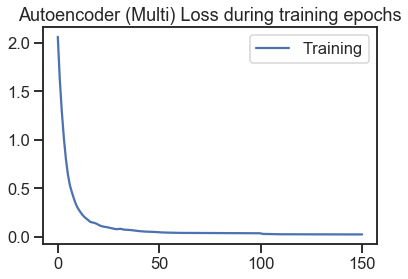

0.02576475584736237


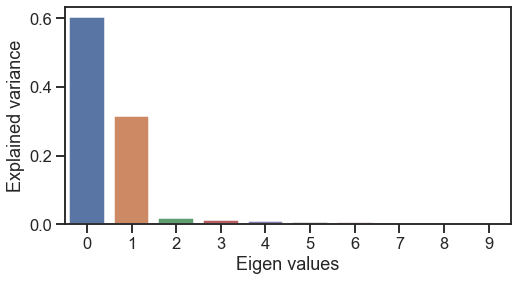

PCA on single-modal explained variance ratio: 0.9829495549201965


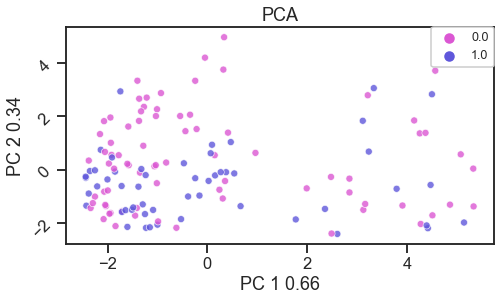

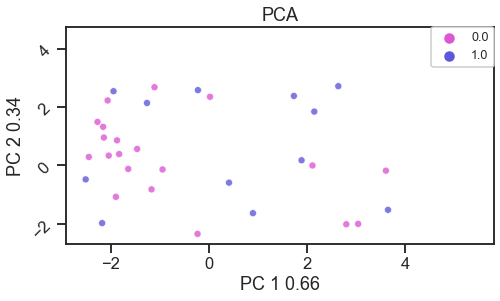

Results for AE: 

Best score for training data: 0.6153846153846153 

Best C: 0.08 



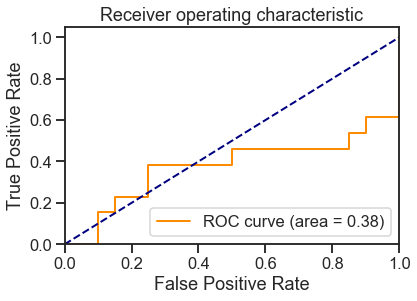

[[17  3]
 [11  2]]


              precision    recall  f1-score   support

           0       0.61      0.85      0.71        20
           1       0.40      0.15      0.22        13

    accuracy                           0.58        33
   macro avg       0.50      0.50      0.47        33
weighted avg       0.53      0.58      0.52        33

Training set score for Logistic Regression: 0.669231
Testing  set score for Logistic Regression: 0.575758
Best score for training data: 0.5923076923076923 

Best C: 0.1 

Best Gamma: scale 



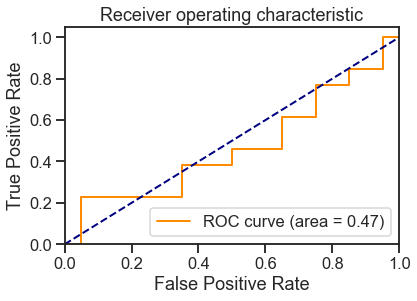

[[20  0]
 [13  0]]


              precision    recall  f1-score   support

           0       0.61      1.00      0.75        20
           1       0.00      0.00      0.00        13

    accuracy                           0.61        33
   macro avg       0.30      0.50      0.38        33
weighted avg       0.37      0.61      0.46        33

Training set score for SVM: 0.592308
Testing  set score for SVM: 0.606061


C:\Users\Tomas\Anaconda3\envs\tensorflow_2\lib\site-packages\sklearn\metrics\_classification.py:1268: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Best score for training data: 0.6384615384615385 

Best #estimators: 140 

Best max depth: None 



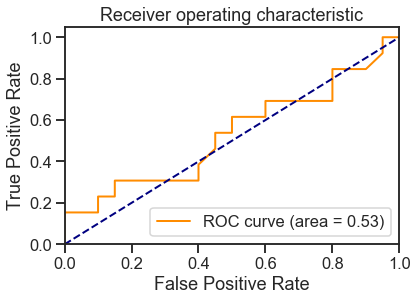

[[17  3]
 [10  3]]


              precision    recall  f1-score   support

           0       0.63      0.85      0.72        20
           1       0.50      0.23      0.32        13

    accuracy                           0.61        33
   macro avg       0.56      0.54      0.52        33
weighted avg       0.58      0.61      0.56        33

Training set score for RFC: 1.000000
Testing  set score for RFC: 0.606061
mutual information: 0.00045063599870930857
AE 2 clusters -  silhoutte score: 0.5147900581359863
AE 3 clusters -  silhoutte score: 0.40573471784591675
AE 4 clusters -  silhoutte score: 0.40977999567985535
AE 5 clusters -  silhoutte score: 0.3624798655509949
AE 6 clusters -  silhoutte score: 0.3791062533855438


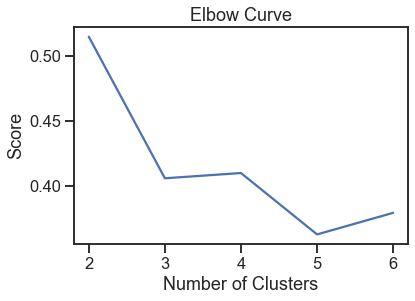

mutual information: 0.00045063599870930857
AE 2 clusters -  silhoutte score: 0.5147900581359863
AE 3 clusters -  silhoutte score: 0.4835208058357239
AE 4 clusters -  silhoutte score: 0.43877315521240234
AE 5 clusters -  silhoutte score: 0.34718915820121765
AE 6 clusters -  silhoutte score: 0.36031752824783325


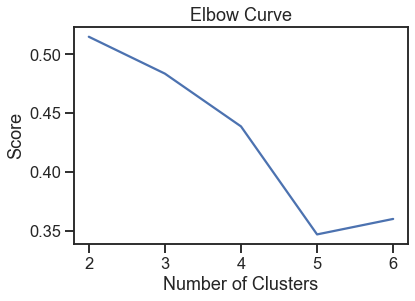

mutual information: 0.00045063599870930857
AE 2 clusters -  silhoutte score: 0.5147900581359863
AE 3 clusters -  silhoutte score: 0.4019280672073364
AE 4 clusters -  silhoutte score: 0.33520954847335815
AE 5 clusters -  silhoutte score: 0.3410704433917999
AE 6 clusters -  silhoutte score: 0.35406172275543213


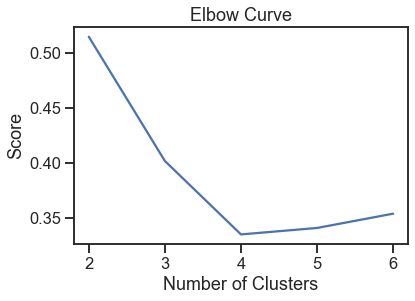

In [46]:
###  Hyperparameter tuning

encoding_dims=[100]
mus=[0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
dropouts = [0.25]
l1s = [0.00005]
l2s = [0.000003]
scores = []
for encoding_dim in encoding_dims:
    for mu in mus:
        for dropout in dropouts:
            for l1 in l1s:
                for l2 in l2s:
                    ## Build and Train Autoencoder
                    autoencoder, encoder, decoder, loss = Models.build_and_train_multi_autoencoder([X_train_first_norm,X_train_second_norm],
                                                                                  [X_train_first_norm,X_train_second_norm],
                                                                                  encoding_dim=encoding_dim, 
                                                                                  regularizer=tf.keras.regularizers.l1_l2(l1,l2),
                                                                                  dropout=dropout,
                                                                                  epochs=200,
                                                                                  mu=mu)
                    ## Encode datasets
                    X_latent_multi_ae = Models.encode_dataset([X_train_first_norm,X_train_second_norm], encoder)
                    X_latent_test_multi_ae = Models.encode_dataset([X_test_first_norm,X_test_second_norm], encoder)

                    ## PCA ON AUTOENCODER LATENT SPACE
                    X_latent_pca_ae, X_latent_test_pca_ae = Models.perform_PCA(X_latent_multi_ae, X_latent_test_multi_ae, y_train, y_test, n_components=10)

                    ### CLASSIFICATION ###
                    classify = Models.classify(X_latent_multi_ae, X_latent_test_multi_ae, np.ravel(y_train), np.ravel(y_test), model_type="AE")

                    ### CLUSTERING ###
                    clustering = Models.cluster(X_latent_multi_ae,np.ravel(y_train), model_type="Multi-AE")

                    scores.append([mu,dropout,l1,l2,loss] + classify + clustering)


In [49]:
scores = pd.DataFrame(scores,
                      columns=["mu","dropout","l1","l2","loss","LR accuracy","SVM accuracy", "RF accuracy", "LR ROC-AUC", "SVM ROC-AUC", "RF ROC-AUC","KMeans Silhouette","KMeans MI","Spectral Silhouette","Spectral MI","Hierarchical Silhouette","Hierarchical MI"])    
scores

mu  dropout       l1        l2      loss  LR accuracy  SVM accuracy  \
0   0.0     0.25  0.00005  0.000003  0.025676     0.636364      0.696970   
1   0.1     0.25  0.00005  0.000003  0.026402     0.666667      0.727273   
2   0.2     0.25  0.00005  0.000003  0.026203     0.606061      0.606061   
3   0.3     0.25  0.00005  0.000003  0.026482     0.666667      0.696970   
4   0.4     0.25  0.00005  0.000003  0.027008     0.727273      0.696970   
5   0.5     0.25  0.00005  0.000003  0.027541     0.575758      0.606061   
6   0.6     0.25  0.00005  0.000003  0.027224     0.575758      0.606061   
7   0.7     0.25  0.00005  0.000003  0.027377     0.545455      0.484848   
8   0.8     0.25  0.00005  0.000003  0.026128     0.575758      0.545455   
9   0.9     0.25  0.00005  0.000003  0.026558     0.606061      0.575758   
10  1.0     0.25  0.00005  0.000003  0.025765     0.575758      0.606061   

    RF accuracy  LR ROC-AUC  SVM ROC-AUC  RF ROC-AUC  KMeans Silhouette  \
0      0.666667    0.715385     0.719231    0.763462           0.391719   
1      0.696970    0.738462     0.711538    0.740385           0.393951   
2      0.727273    0.726923     0.688462    0.684615           0.350240   
3      0.696970    0.742308     0.730769    0.723077           0.344237   
4      0.696970    0.761538     0.750000    0.761538           0.358747   
5      0.575758    0.376923     0.465385    0.498077           0.534400   
6      0.545455    0.576923     0.615385    0.461538           0.417492   
7      0.424242    0.361538     0.419231    0.355769           0.451382   
8      0.484848    0.403846     0.415385    0.507692           0.420072   
9      0.606061    0.400000     0.507692    0.453846           0.456264   
10     0.606061    0.376923     0.469231    0.530769           0.514790   

    KMeans MI  Spectral Silhouette  Spectral MI  Hierarchical Silhouette  \
0    0.008473             0.360199     0.011256                 0.305007   
1    0.009236             0.395654     0.000471                 0.397730   
2    0.015401             0.339639     0.015361                 0.358707   
3    0.001093             0.348198     0.010846                 0.380486   
4    0.005918             0.371124     0.007815                 0.336806   
5    0.002463             0.545597     0.013369                 0.549029   
6    0.000424             0.414027     0.001707                 0.413076   
7    0.054995             0.496172     0.051926                 0.496172   
8    0.000451             0.327031     0.000034                 0.420072   
9    0.007735             0.471254     0.000471                 0.465550   
10   0.000451             0.514790     0.000451                 0.514790   

    Hierarchical MI  
0          0.013382  
1          0.005743  
2          0.007748  
3          0.000413  
4          0.032359  
5          0.005819  
6          0.000114  
7          0.051926  
8          0.000451  
9          0.000050  
10         0.000451

### Results

| dim | mu  | l1      | l2      | Dropout | Loss   | Accuracy (LR) | Accuracy (SVM) | Accuracy (RF) | ROC-AUC (LR) | ROC-AUC (SVM) | ROC-AUC (RF) | SS (K-means) | MI (K-means) | SS (Spectral) | MI (Spectral) | SS (Hierarch.) | MI (Hierarch.) |
|-----|-----|---------|---------|---------|--------|---------------|----------------|---------------|--------------|---------------|--------------|--------------|--------------|---------------|---------------|----------------|----------------|
| 50  | 0.5 | 0       | 0       | 0.00    | 0.0159 |  0.57         | 0.63           | 0.57          | 0.5153       | 0.5346        | 0.5403       | 0.10         | 0.0764       | 0.11          | 0.0326        | 0.09           | 0.0454         |
| 50  | 0.5 | 0       | 0       | 0.05    | 0.0189 |  0.60         | 0.66           | 0.51          | 0.4961       | 0.5961        | 0.4942       | 0.14         | 0.0003       | 0.14          | 0.0010        | 0.12           | 0.0027         |
| 50  | 0.5 | 0       | 0       | 0.10    | 0.0220 |  0.57         | 0.57           | 0.45          | 0.4961       | 0.4923        | 0.4923       | 0.19         | 0.0221       | 0.19          | 0.0178        | 0.19           | 0.0122         |
| 50  | 0.5 | 0       | 0       | 0.15    | 0.0227 |  0.63         | 0.57           | 0.57          | 0.5269       | 0.5692        | 0.4750       | 0.19         | 0.0009       | 0.20          | 0.0000        | 0.17           | 0.0081         |
| 50  | 0.5 | 0       | 0       | 0.25    | 0.0240 |  0.66         | 0.60           | 0.57          | 0.4846       | 0.5615        | 0.6750       | 0.20         | 0.0000       | 0.20          | 0.0002        | 0.17           | 0.0012         |
|-----|-----|---------|---------|---------|--------|---------------|----------------|---------------|--------------|---------------|--------------|--------------|--------------|---------------|---------------|----------------|----------------|
| 50  | 0.5 | 0.00005 | 0       | 0.25    | 0.0270 |  0.63         | 0.60           | 0.54          | 0.4769       | 0.5384        | 0.5269       | 0.29         | 0.0000       | 0.29          | 0.0002        | 0.26           | 0.0087         |
| 50  | 0.5 | 0.0002  | 0       | 0.25    | 0.0276 |  0.60         | 0.60           | 0.63          | 0.5269       | 0.4000        | 0.6461       | 0.40         | 0.0144       | 0.40          | 0.0144        | 0.38           | 0.0109         |
|-----|-----|---------|---------|---------|--------|---------------|----------------|---------------|--------------|---------------|--------------|--------------|--------------|---------------|---------------|----------------|----------------|
| 50  | 0.5 | 0.00005 | 0.000003| 0.25    | 0.0268 |  0.63         | 0.60           | 0.66          | 0.7153       | 0.7192        | 0.6750       | 0.39         | 0.0029       | 0.38          | 0.0018        | 0.36           | 0.0000         |
|-----|-----|---------|---------|---------|--------|---------------|----------------|---------------|--------------|---------------|--------------|--------------|--------------|---------------|---------------|----------------|----------------|
| 150 | 0.5 | 0.00005 | 0.000003| 0.25    | 0.0270 |  0.63         | 0.60           | 0.66          | 0.7269       | 0.7884        | 0.7807       | 0.31         | 0.0186       | 0.27          | 0.0313        | 0.29           | 0.0323         |


In [50]:
scores.index = l2s

data_acc = scores[["LR accuracy","SVM accuracy","RF accuracy"]]
data_acc.loc[:,"average"] = data_acc.mean(axis=1)

data_auc = scores[["LR ROC-AUC", "SVM ROC-AUC", "RF ROC-AUC"]]
data_auc.loc[:,"average"] = data_auc.mean(axis=1)

data_ss = scores[["KMeans Silhouette","Spectral Silhouette","Hierarchical Silhouette"]]
data_ss.loc[:,"average"] = data_ss.mean(axis=1)

data_mi = scores[["KMeans MI","Spectral MI","Hierarchical MI"]]
data_mi.loc[:,"average"] = data_mi.mean(axis=1)

sns.set()
hyperparam = "dims"

ax = sns.lineplot(data=data_acc)
plt.legend(fontsize='small')
ax.set_xlabel(hyperparam)
ax.set_ylabel(f"accuracy")
ax.figure.set_size_inches(10 , 5)
ax.set_title(f"{hyperparam} vs model accuracy")
plt.show()

ax = sns.lineplot(data=data_auc)
plt.legend(fontsize='small')
ax.set_xlabel(hyperparam)
ax.set_ylabel(f"ROC-AUC")
ax.figure.set_size_inches(10 , 5)
ax.set_title(f"{hyperparam} vs ROC-AUC")
plt.show()

ax = sns.lineplot(data=data_ss)
plt.legend(fontsize='small')
ax.set_xlabel(hyperparam)
ax.set_ylabel(f"Silhoutte Score")
ax.figure.set_size_inches(10 , 5)
ax.set_title(f"{hyperparam} vs Silhoutette Score")
plt.show()

ax = sns.lineplot(data=data_mi)
plt.legend(fontsize='small')
ax.set_xlabel(hyperparam)
ax.set_ylabel(f"Mutual Information")
ax.figure.set_size_inches(10 , 5)
ax.set_title(f"{hyperparam} vs Mutual Information")
plt.show()

C:\Users\Tomas\Anaconda3\envs\tensorflow_2\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


LR accuracy  SVM accuracy  RF accuracy   average
0.0     0.636364      0.696970     0.666667  0.666667
0.1     0.666667      0.727273     0.696970  0.696970
0.2     0.606061      0.606061     0.727273  0.646465
0.3     0.666667      0.696970     0.696970  0.686869
0.4     0.727273      0.696970     0.696970  0.707071
0.5     0.575758      0.606061     0.575758  0.585859
0.6     0.575758      0.606061     0.545455  0.575758
0.7     0.545455      0.484848     0.424242  0.484848
0.8     0.575758      0.545455     0.484848  0.535354
0.9     0.606061      0.575758     0.606061  0.595960
1.0     0.575758      0.606061     0.606061  0.595960

Compression: 105.88

Epoch 00032: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 00037: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.
Epoch 00037: early stopping


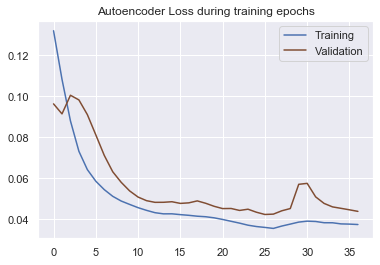

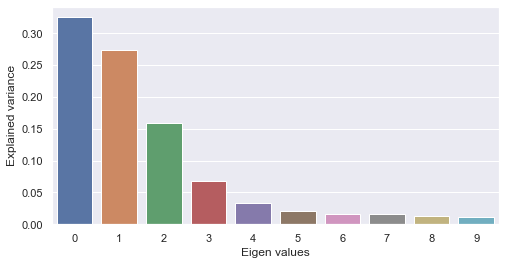

PCA on single-modal explained variance ratio: 0.9389267563819885


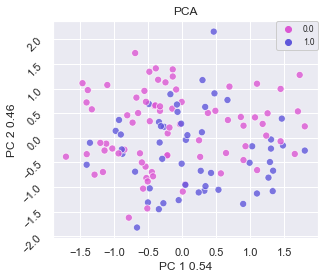

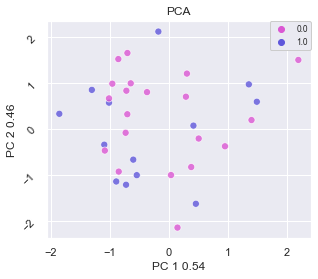

Results for AE: 

Best score for training data: 0.6538461538461539 

Best C: 0.08 



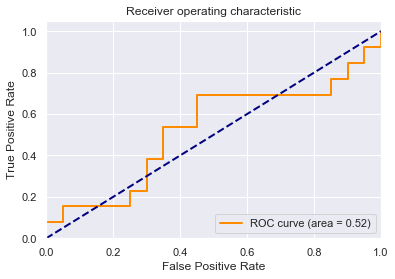

[[16  4]
 [11  2]]


              precision    recall  f1-score   support

           0       0.59      0.80      0.68        20
           1       0.33      0.15      0.21        13

    accuracy                           0.55        33
   macro avg       0.46      0.48      0.45        33
weighted avg       0.49      0.55      0.50        33

Training set score for Logistic Regression: 0.707692
Testing  set score for Logistic Regression: 0.545455
Best score for training data: 0.6153846153846153 

Best C: 1.0 

Best Gamma: 0.1 



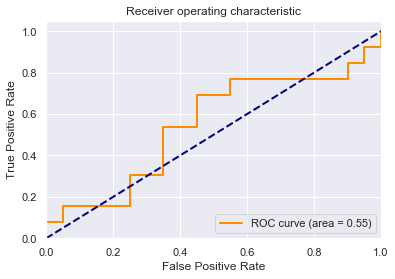

[[16  4]
 [11  2]]


              precision    recall  f1-score   support

           0       0.59      0.80      0.68        20
           1       0.33      0.15      0.21        13

    accuracy                           0.55        33
   macro avg       0.46      0.48      0.45        33
weighted avg       0.49      0.55      0.50        33

Training set score for SVM: 0.707692
Testing  set score for SVM: 0.545455
Best score for training data: 0.5923076923076923 

Best #estimators: 140 

Best max depth: None 



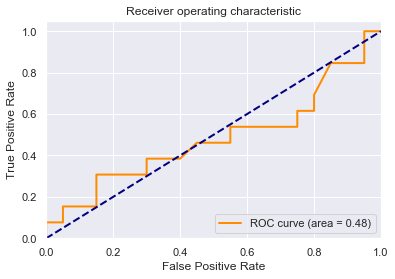

[[17  3]
 [ 9  4]]


              precision    recall  f1-score   support

           0       0.65      0.85      0.74        20
           1       0.57      0.31      0.40        13

    accuracy                           0.64        33
   macro avg       0.61      0.58      0.57        33
weighted avg       0.62      0.64      0.61        33

Training set score for RFC: 1.000000
Testing  set score for RFC: 0.636364
mutual information: 0.02013852929271454
AE 2 clusters -  silhoutte score: 0.20078758895397186
AE 3 clusters -  silhoutte score: 0.22805733978748322
AE 4 clusters -  silhoutte score: 0.23606346547603607
AE 5 clusters -  silhoutte score: 0.21397045254707336
AE 6 clusters -  silhoutte score: 0.19021864235401154


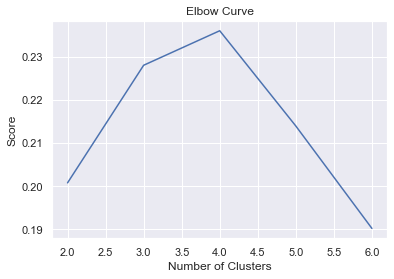

mutual information: 0.00030975592824811
AE 2 clusters -  silhoutte score: 0.22899936139583588
AE 3 clusters -  silhoutte score: 0.23462462425231934
AE 4 clusters -  silhoutte score: 0.22698237001895905
AE 5 clusters -  silhoutte score: 0.20698323845863342
AE 6 clusters -  silhoutte score: 0.1972031593322754


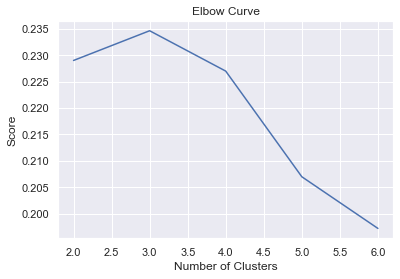

mutual information: 0.027083040501789054
AE 2 clusters -  silhoutte score: 0.20218995213508606
AE 3 clusters -  silhoutte score: 0.20246224105358124
AE 4 clusters -  silhoutte score: 0.19785188138484955
AE 5 clusters -  silhoutte score: 0.18395210802555084
AE 6 clusters -  silhoutte score: 0.16926325857639313


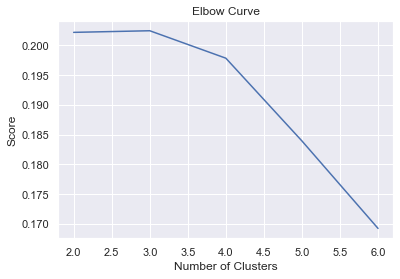

Compression: 105.88

Epoch 00041: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 00046: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.
Epoch 00046: early stopping


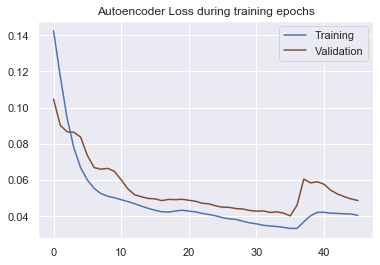

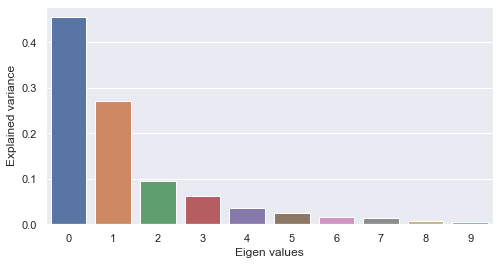

PCA on single-modal explained variance ratio: 0.9862120151519775


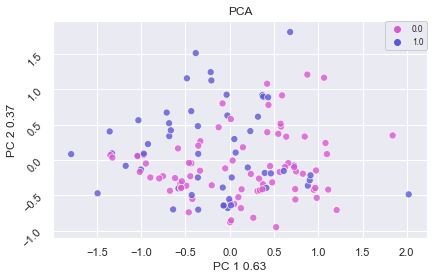

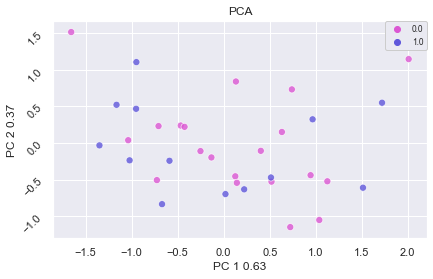

Results for AE: 

Best score for training data: 0.6461538461538462 

Best C: 0.08 



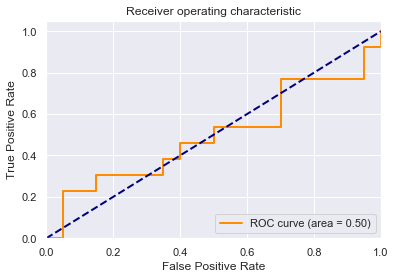

[[19  1]
 [10  3]]


              precision    recall  f1-score   support

           0       0.66      0.95      0.78        20
           1       0.75      0.23      0.35        13

    accuracy                           0.67        33
   macro avg       0.70      0.59      0.56        33
weighted avg       0.69      0.67      0.61        33

Training set score for Logistic Regression: 0.676923
Testing  set score for Logistic Regression: 0.666667
Best score for training data: 0.6692307692307692 

Best C: 1.0 

Best Gamma: 0.1 



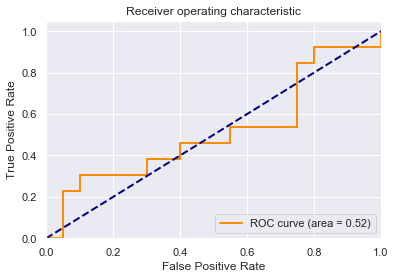

[[18  2]
 [10  3]]


              precision    recall  f1-score   support

           0       0.64      0.90      0.75        20
           1       0.60      0.23      0.33        13

    accuracy                           0.64        33
   macro avg       0.62      0.57      0.54        33
weighted avg       0.63      0.64      0.59        33

Training set score for SVM: 0.676923
Testing  set score for SVM: 0.636364
Best score for training data: 0.6692307692307692 

Best #estimators: 140 

Best max depth: None 



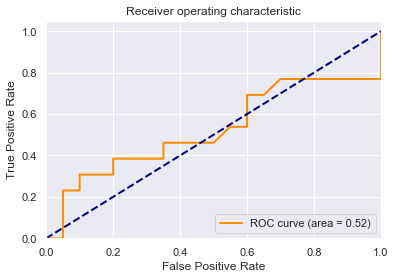

[[15  5]
 [ 8  5]]


              precision    recall  f1-score   support

           0       0.65      0.75      0.70        20
           1       0.50      0.38      0.43        13

    accuracy                           0.61        33
   macro avg       0.58      0.57      0.57        33
weighted avg       0.59      0.61      0.59        33

Training set score for RFC: 1.000000
Testing  set score for RFC: 0.606061
mutual information: 0.015473128543363008
AE 2 clusters -  silhoutte score: 0.27377238869667053
AE 3 clusters -  silhoutte score: 0.2893313765525818
AE 4 clusters -  silhoutte score: 0.2518846094608307
AE 5 clusters -  silhoutte score: 0.24438461661338806
AE 6 clusters -  silhoutte score: 0.20349916815757751


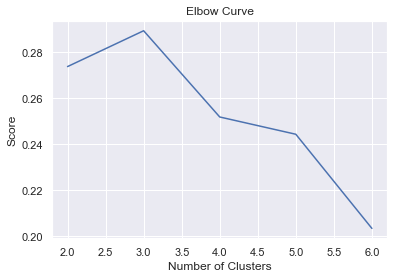

mutual information: 0.007832121815071874
AE 2 clusters -  silhoutte score: 0.26935023069381714
AE 3 clusters -  silhoutte score: 0.29038459062576294
AE 4 clusters -  silhoutte score: 0.225582093000412
AE 5 clusters -  silhoutte score: 0.250933438539505
AE 6 clusters -  silhoutte score: 0.2354162633419037


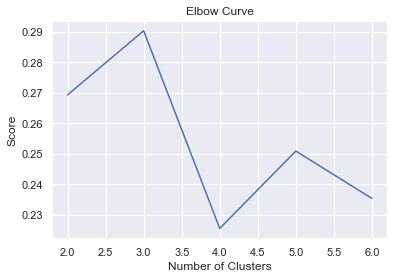

mutual information: 0.0036743419773889764
AE 2 clusters -  silhoutte score: 0.2144768238067627
AE 3 clusters -  silhoutte score: 0.24743534624576569
AE 4 clusters -  silhoutte score: 0.21906764805316925
AE 5 clusters -  silhoutte score: 0.22548343241214752
AE 6 clusters -  silhoutte score: 0.2319892793893814


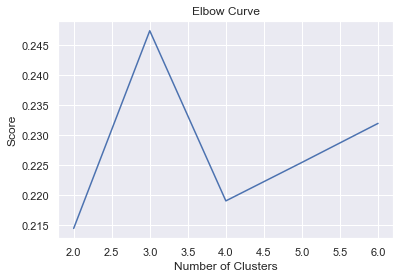

Compression: 105.88

Epoch 00040: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 00073: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.

Epoch 00087: ReduceLROnPlateau reducing learning rate to 1.0000000656873453e-06.

Epoch 00092: ReduceLROnPlateau reducing learning rate to 1.0000001111620805e-07.
Epoch 00092: early stopping


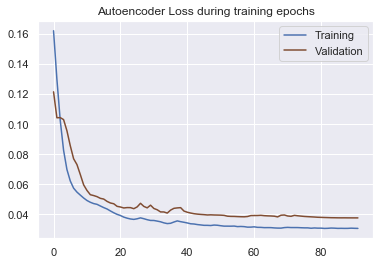

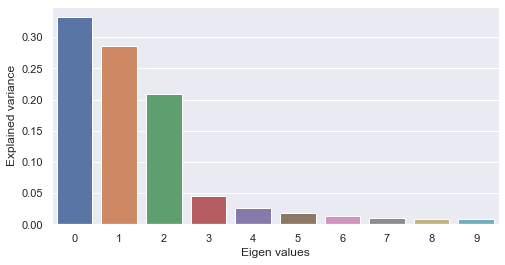

PCA on single-modal explained variance ratio: 0.9557269811630249


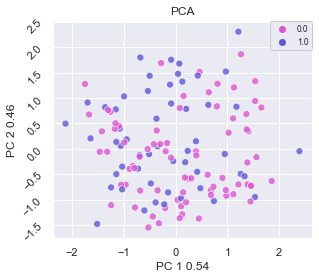

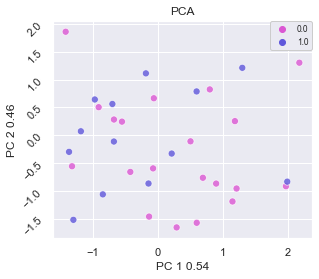

Results for AE: 

Best score for training data: 0.6538461538461539 

Best C: 0.08 



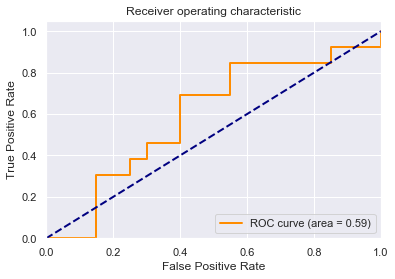

[[17  3]
 [ 9  4]]


              precision    recall  f1-score   support

           0       0.65      0.85      0.74        20
           1       0.57      0.31      0.40        13

    accuracy                           0.64        33
   macro avg       0.61      0.58      0.57        33
weighted avg       0.62      0.64      0.61        33

Training set score for Logistic Regression: 0.692308
Testing  set score for Logistic Regression: 0.636364
Best score for training data: 0.5923076923076923 

Best C: 0.1 

Best Gamma: scale 



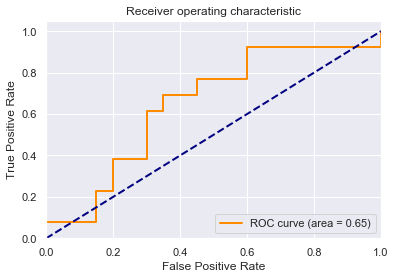

[[20  0]
 [13  0]]


              precision    recall  f1-score   support

           0       0.61      1.00      0.75        20
           1       0.00      0.00      0.00        13

    accuracy                           0.61        33
   macro avg       0.30      0.50      0.38        33
weighted avg       0.37      0.61      0.46        33

Training set score for SVM: 0.592308
Testing  set score for SVM: 0.606061


C:\Users\Tomas\Anaconda3\envs\tensorflow_2\lib\site-packages\sklearn\metrics\_classification.py:1268: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Best score for training data: 0.623076923076923 

Best #estimators: 140 

Best max depth: None 



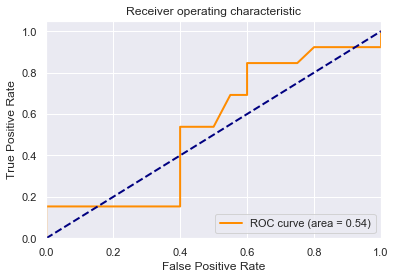

[[15  5]
 [11  2]]


              precision    recall  f1-score   support

           0       0.58      0.75      0.65        20
           1       0.29      0.15      0.20        13

    accuracy                           0.52        33
   macro avg       0.43      0.45      0.43        33
weighted avg       0.46      0.52      0.47        33

Training set score for RFC: 1.000000
Testing  set score for RFC: 0.515152
mutual information: 0.0037289571220810833
AE 2 clusters -  silhoutte score: 0.22091752290725708
AE 3 clusters -  silhoutte score: 0.2699600160121918
AE 4 clusters -  silhoutte score: 0.2826460003852844
AE 5 clusters -  silhoutte score: 0.2456066757440567
AE 6 clusters -  silhoutte score: 0.2410062700510025


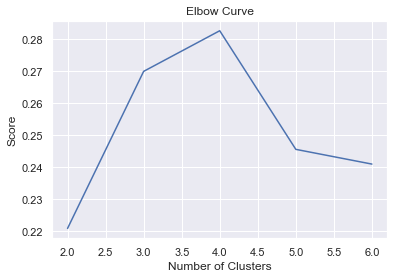

mutual information: 6.052810403441833e-05
AE 2 clusters -  silhoutte score: 0.2180294543504715
AE 3 clusters -  silhoutte score: 0.267016738653183
AE 4 clusters -  silhoutte score: 0.2817767560482025
AE 5 clusters -  silhoutte score: 0.25093525648117065
AE 6 clusters -  silhoutte score: 0.2243983894586563


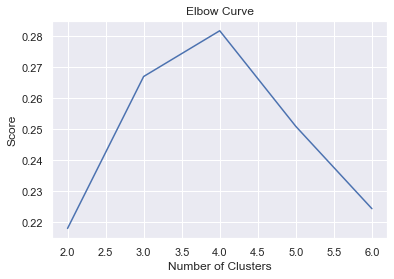

mutual information: 0.002741368058958762
AE 2 clusters -  silhoutte score: 0.21577662229537964
AE 3 clusters -  silhoutte score: 0.25843673944473267
AE 4 clusters -  silhoutte score: 0.2609688341617584
AE 5 clusters -  silhoutte score: 0.2435808926820755
AE 6 clusters -  silhoutte score: 0.22479823231697083


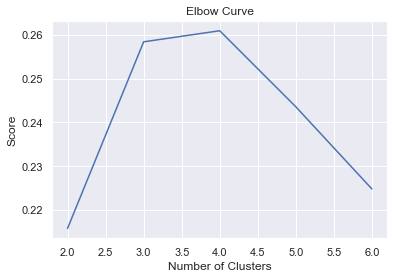

Compression: 105.88

Epoch 00037: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 00042: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.
Epoch 00042: early stopping


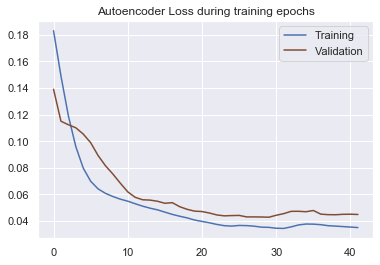

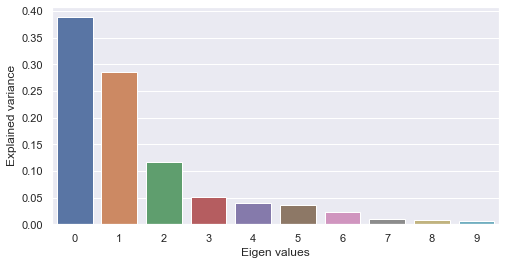

PCA on single-modal explained variance ratio: 0.965936005115509


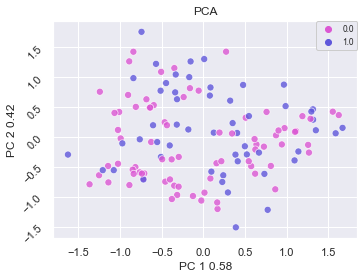

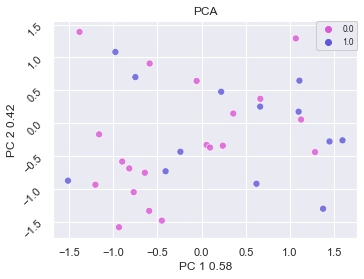

Results for AE: 

Best score for training data: 0.6 

Best C: 0.08 



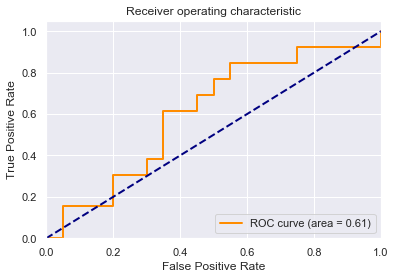

[[19  1]
 [12  1]]


              precision    recall  f1-score   support

           0       0.61      0.95      0.75        20
           1       0.50      0.08      0.13        13

    accuracy                           0.61        33
   macro avg       0.56      0.51      0.44        33
weighted avg       0.57      0.61      0.50        33

Training set score for Logistic Regression: 0.638462
Testing  set score for Logistic Regression: 0.606061
Best score for training data: 0.6153846153846153 

Best C: 1.0 

Best Gamma: 0.1 



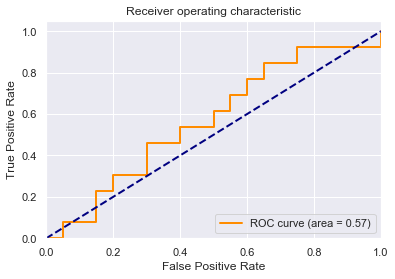

[[17  3]
 [12  1]]


              precision    recall  f1-score   support

           0       0.59      0.85      0.69        20
           1       0.25      0.08      0.12        13

    accuracy                           0.55        33
   macro avg       0.42      0.46      0.41        33
weighted avg       0.45      0.55      0.47        33

Training set score for SVM: 0.676923
Testing  set score for SVM: 0.545455
Best score for training data: 0.6307692307692307 

Best #estimators: 100 

Best max depth: 12 



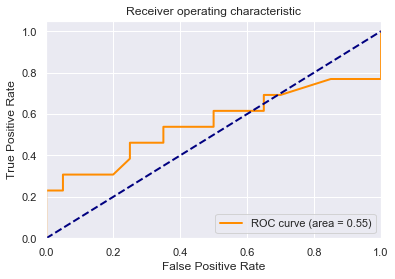

[[15  5]
 [ 8  5]]


              precision    recall  f1-score   support

           0       0.65      0.75      0.70        20
           1       0.50      0.38      0.43        13

    accuracy                           0.61        33
   macro avg       0.58      0.57      0.57        33
weighted avg       0.59      0.61      0.59        33

Training set score for RFC: 1.000000
Testing  set score for RFC: 0.606061
mutual information: 0.007055665576791031
AE 2 clusters -  silhoutte score: 0.27321529388427734
AE 3 clusters -  silhoutte score: 0.29251474142074585
AE 4 clusters -  silhoutte score: 0.3030517101287842
AE 5 clusters -  silhoutte score: 0.2722497284412384
AE 6 clusters -  silhoutte score: 0.2396981120109558


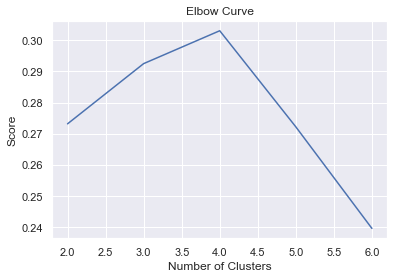

mutual information: 0.0030096760564745748
AE 2 clusters -  silhoutte score: 0.256686270236969
AE 3 clusters -  silhoutte score: 0.2859725058078766
AE 4 clusters -  silhoutte score: 0.291625440120697
AE 5 clusters -  silhoutte score: 0.26448380947113037
AE 6 clusters -  silhoutte score: 0.22349733114242554


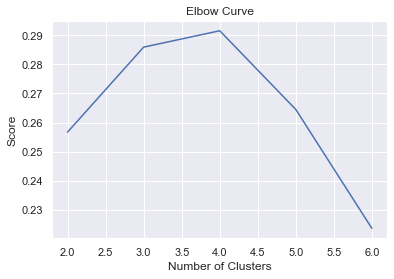

mutual information: 0.007055665576791031
AE 2 clusters -  silhoutte score: 0.27321529388427734
AE 3 clusters -  silhoutte score: 0.28426966071128845
AE 4 clusters -  silhoutte score: 0.30311569571495056
AE 5 clusters -  silhoutte score: 0.2727290689945221
AE 6 clusters -  silhoutte score: 0.2502051591873169


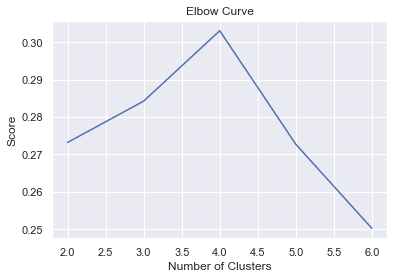

Compression: 105.88

Epoch 00037: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 00042: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.
Epoch 00043: early stopping


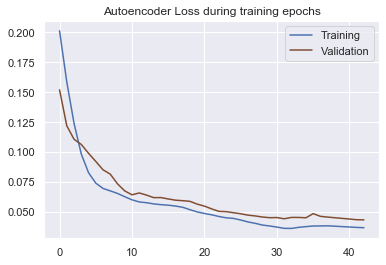

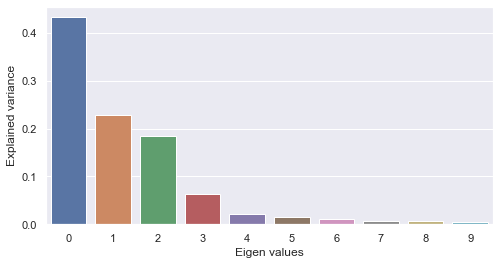

PCA on single-modal explained variance ratio: 0.9737166166305542


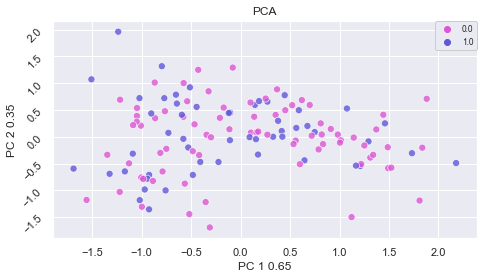

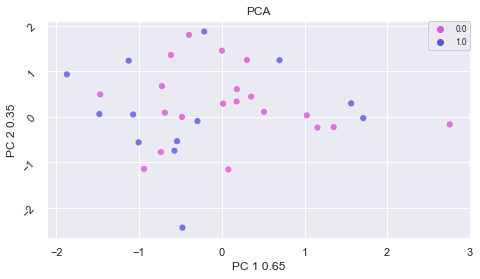

Results for AE: 

Best score for training data: 0.6153846153846153 

Best C: 0.08 



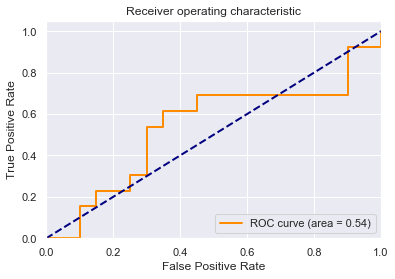

[[15  5]
 [10  3]]


              precision    recall  f1-score   support

           0       0.60      0.75      0.67        20
           1       0.38      0.23      0.29        13

    accuracy                           0.55        33
   macro avg       0.49      0.49      0.48        33
weighted avg       0.51      0.55      0.52        33

Training set score for Logistic Regression: 0.661538
Testing  set score for Logistic Regression: 0.545455
Best score for training data: 0.6230769230769231 

Best C: 1.0 

Best Gamma: 0.1 



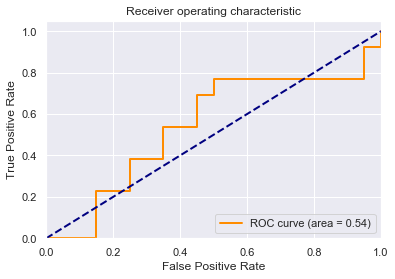

[[15  5]
 [ 9  4]]


              precision    recall  f1-score   support

           0       0.62      0.75      0.68        20
           1       0.44      0.31      0.36        13

    accuracy                           0.58        33
   macro avg       0.53      0.53      0.52        33
weighted avg       0.55      0.58      0.56        33

Training set score for SVM: 0.707692
Testing  set score for SVM: 0.575758
Best score for training data: 0.5692307692307692 

Best #estimators: 140 

Best max depth: None 



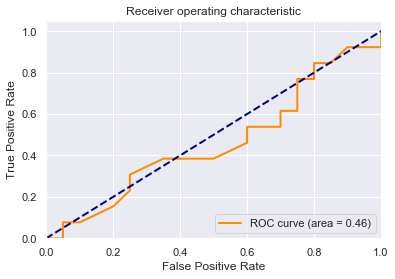

[[13  7]
 [ 8  5]]


              precision    recall  f1-score   support

           0       0.62      0.65      0.63        20
           1       0.42      0.38      0.40        13

    accuracy                           0.55        33
   macro avg       0.52      0.52      0.52        33
weighted avg       0.54      0.55      0.54        33

Training set score for RFC: 1.000000
Testing  set score for RFC: 0.545455
mutual information: 0.0037289571220810833
AE 2 clusters -  silhoutte score: 0.28218507766723633
AE 3 clusters -  silhoutte score: 0.2570325434207916
AE 4 clusters -  silhoutte score: 0.28311991691589355
AE 5 clusters -  silhoutte score: 0.2479231059551239
AE 6 clusters -  silhoutte score: 0.25318795442581177


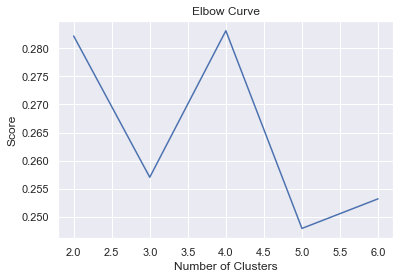

mutual information: 0.0026073113308116127
AE 2 clusters -  silhoutte score: 0.28110912442207336
AE 3 clusters -  silhoutte score: 0.2503015697002411
AE 4 clusters -  silhoutte score: 0.27996841073036194
AE 5 clusters -  silhoutte score: 0.2551121413707733
AE 6 clusters -  silhoutte score: 0.2409156858921051


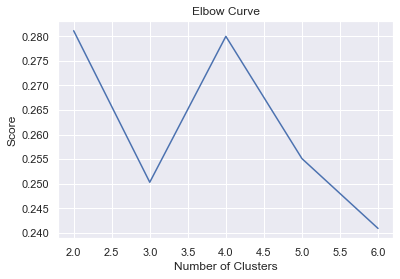

mutual information: 2.0831116827721218e-05
AE 2 clusters -  silhoutte score: 0.2593555152416229
AE 3 clusters -  silhoutte score: 0.2412879467010498
AE 4 clusters -  silhoutte score: 0.2606884241104126
AE 5 clusters -  silhoutte score: 0.2198280543088913
AE 6 clusters -  silhoutte score: 0.21494680643081665


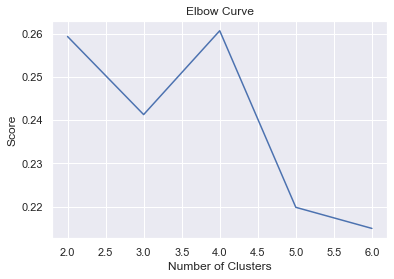

Compression: 105.88

Epoch 00042: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 00047: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.
Epoch 00047: early stopping


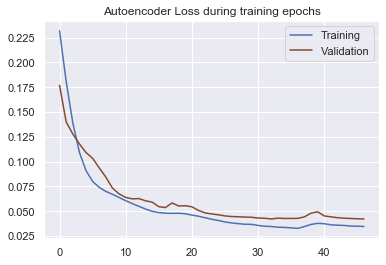

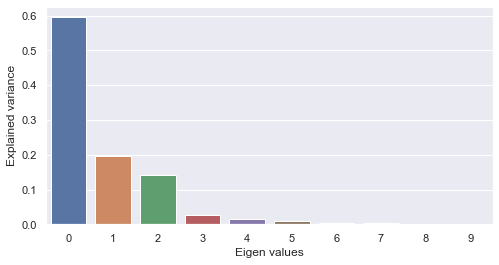

PCA on single-modal explained variance ratio: 0.9957743287086487


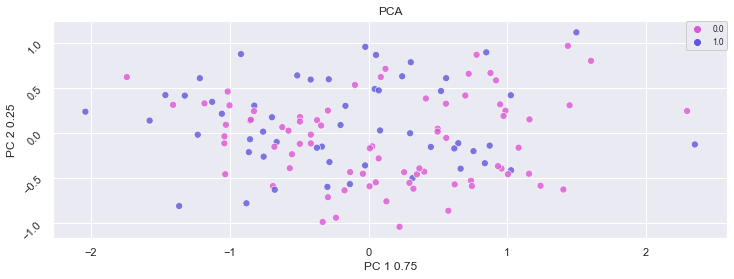

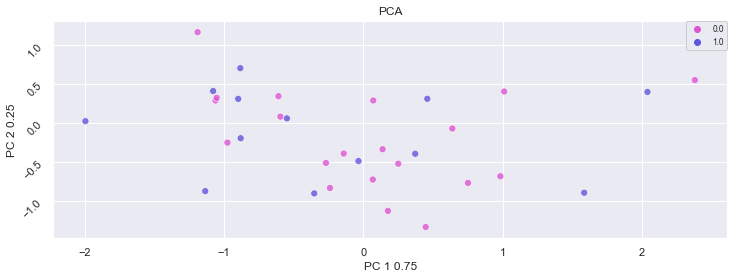

Results for AE: 

Best score for training data: 0.6 

Best C: 0.08 



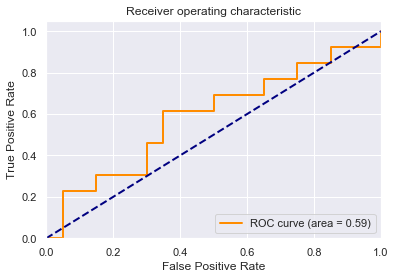

[[18  2]
 [10  3]]


              precision    recall  f1-score   support

           0       0.64      0.90      0.75        20
           1       0.60      0.23      0.33        13

    accuracy                           0.64        33
   macro avg       0.62      0.57      0.54        33
weighted avg       0.63      0.64      0.59        33

Training set score for Logistic Regression: 0.615385
Testing  set score for Logistic Regression: 0.636364
Best score for training data: 0.5923076923076923 

Best C: 0.1 

Best Gamma: scale 



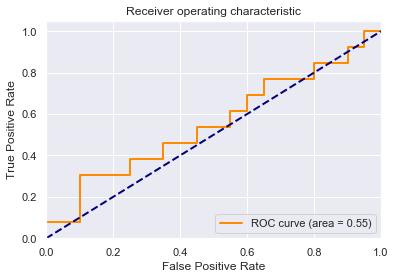

[[20  0]
 [13  0]]


              precision    recall  f1-score   support

           0       0.61      1.00      0.75        20
           1       0.00      0.00      0.00        13

    accuracy                           0.61        33
   macro avg       0.30      0.50      0.38        33
weighted avg       0.37      0.61      0.46        33

Training set score for SVM: 0.592308
Testing  set score for SVM: 0.606061


C:\Users\Tomas\Anaconda3\envs\tensorflow_2\lib\site-packages\sklearn\metrics\_classification.py:1268: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Best score for training data: 0.6384615384615384 

Best #estimators: 140 

Best max depth: None 



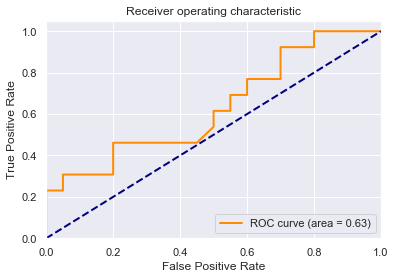

[[16  4]
 [ 9  4]]


              precision    recall  f1-score   support

           0       0.64      0.80      0.71        20
           1       0.50      0.31      0.38        13

    accuracy                           0.61        33
   macro avg       0.57      0.55      0.55        33
weighted avg       0.58      0.61      0.58        33

Training set score for RFC: 1.000000
Testing  set score for RFC: 0.606061
mutual information: 0.014882763524292375
AE 2 clusters -  silhoutte score: 0.34335291385650635
AE 3 clusters -  silhoutte score: 0.3090687096118927
AE 4 clusters -  silhoutte score: 0.2610202431678772
AE 5 clusters -  silhoutte score: 0.24423779547214508
AE 6 clusters -  silhoutte score: 0.24607834219932556


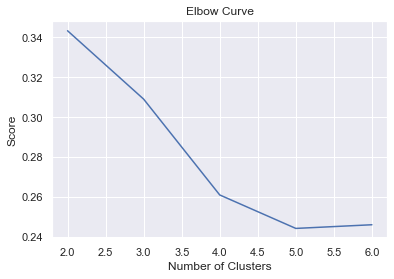

mutual information: 0.014882763524292375
AE 2 clusters -  silhoutte score: 0.34335291385650635
AE 3 clusters -  silhoutte score: 0.3050158619880676
AE 4 clusters -  silhoutte score: 0.31878527998924255
AE 5 clusters -  silhoutte score: 0.22604398429393768
AE 6 clusters -  silhoutte score: 0.24087829887866974


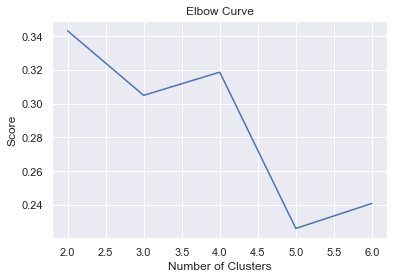

mutual information: 0.026656391469619754
AE 2 clusters -  silhoutte score: 0.3278229832649231
AE 3 clusters -  silhoutte score: 0.2927601635456085
AE 4 clusters -  silhoutte score: 0.24675266444683075
AE 5 clusters -  silhoutte score: 0.22599662840366364
AE 6 clusters -  silhoutte score: 0.2041170299053192


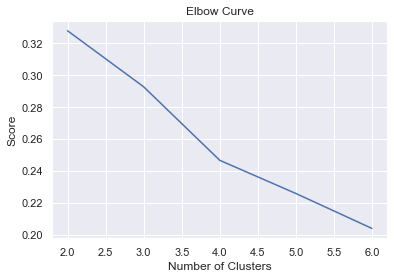

Compression: 105.88

Epoch 00060: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 00098: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.

Epoch 00109: ReduceLROnPlateau reducing learning rate to 1.0000000656873453e-06.

Epoch 00114: ReduceLROnPlateau reducing learning rate to 1.0000001111620805e-07.

Epoch 00119: ReduceLROnPlateau reducing learning rate to 1.000000082740371e-08.
Epoch 00119: early stopping


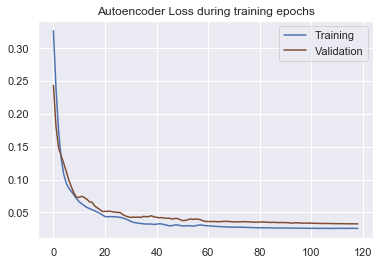

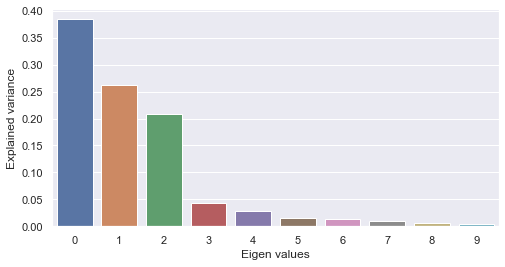

PCA on single-modal explained variance ratio: 0.9753673672676086


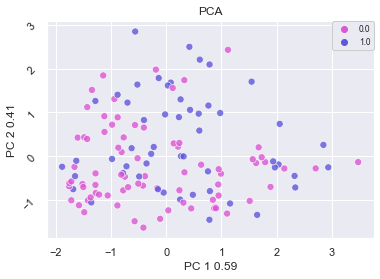

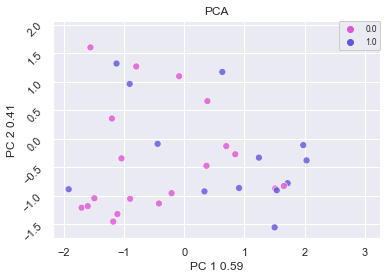

Results for AE: 

Best score for training data: 0.6538461538461539 

Best C: 0.08 



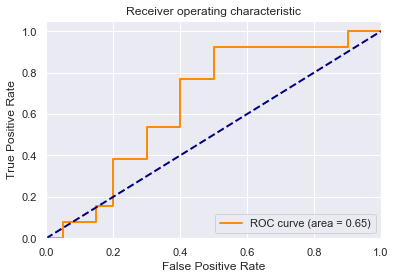

[[17  3]
 [11  2]]


              precision    recall  f1-score   support

           0       0.61      0.85      0.71        20
           1       0.40      0.15      0.22        13

    accuracy                           0.58        33
   macro avg       0.50      0.50      0.47        33
weighted avg       0.53      0.58      0.52        33

Training set score for Logistic Regression: 0.676923
Testing  set score for Logistic Regression: 0.575758
Best score for training data: 0.6538461538461539 

Best C: 1.0 

Best Gamma: 0.1 



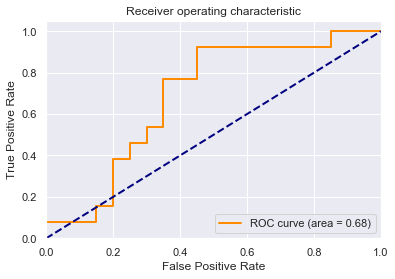

[[17  3]
 [11  2]]


              precision    recall  f1-score   support

           0       0.61      0.85      0.71        20
           1       0.40      0.15      0.22        13

    accuracy                           0.58        33
   macro avg       0.50      0.50      0.47        33
weighted avg       0.53      0.58      0.52        33

Training set score for SVM: 0.715385
Testing  set score for SVM: 0.575758
Best score for training data: 0.6538461538461537 

Best #estimators: 140 

Best max depth: None 



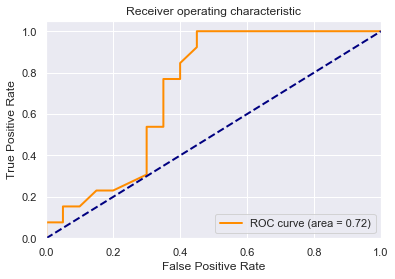

[[16  4]
 [10  3]]


              precision    recall  f1-score   support

           0       0.62      0.80      0.70        20
           1       0.43      0.23      0.30        13

    accuracy                           0.58        33
   macro avg       0.52      0.52      0.50        33
weighted avg       0.54      0.58      0.54        33

Training set score for RFC: 1.000000
Testing  set score for RFC: 0.575758
mutual information: 0.0001007545818716402
AE 2 clusters -  silhoutte score: 0.28690922260284424
AE 3 clusters -  silhoutte score: 0.29668286442756653
AE 4 clusters -  silhoutte score: 0.28974491357803345
AE 5 clusters -  silhoutte score: 0.3071451485157013
AE 6 clusters -  silhoutte score: 0.2996285557746887


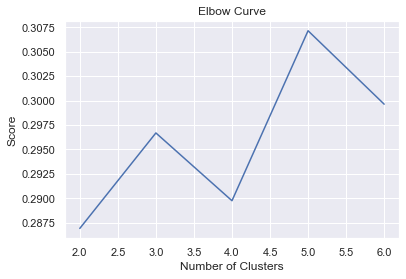

mutual information: 0.0007981961203013009
AE 2 clusters -  silhoutte score: 0.29058837890625
AE 3 clusters -  silhoutte score: 0.2844505310058594
AE 4 clusters -  silhoutte score: 0.2862994372844696
AE 5 clusters -  silhoutte score: 0.2729208767414093
AE 6 clusters -  silhoutte score: 0.2800966203212738


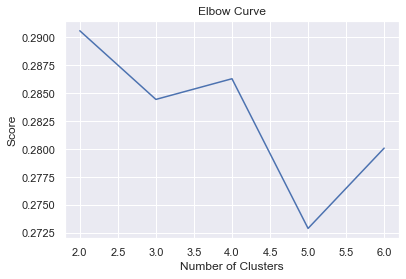

mutual information: 0.00021498047633589874
AE 2 clusters -  silhoutte score: 0.28098782896995544
AE 3 clusters -  silhoutte score: 0.271095871925354
AE 4 clusters -  silhoutte score: 0.29447460174560547
AE 5 clusters -  silhoutte score: 0.2556517422199249
AE 6 clusters -  silhoutte score: 0.25072795152664185


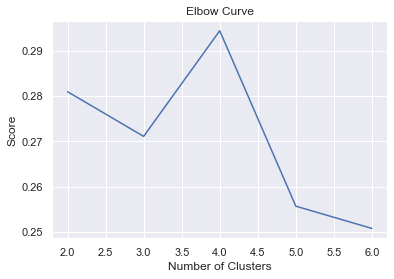

Compression: 105.88

Epoch 00047: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 00052: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.
Epoch 00053: early stopping


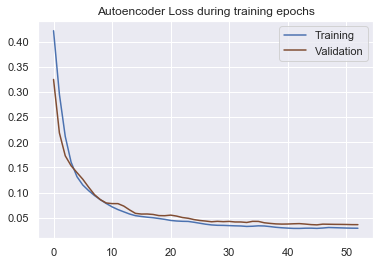

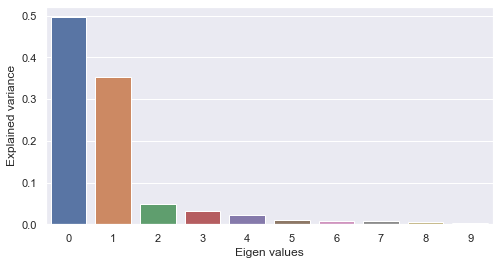

PCA on single-modal explained variance ratio: 0.9881488680839539


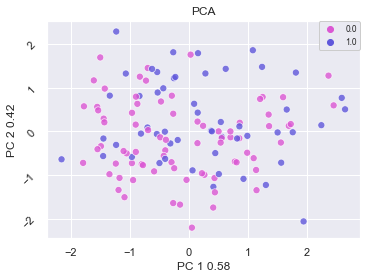

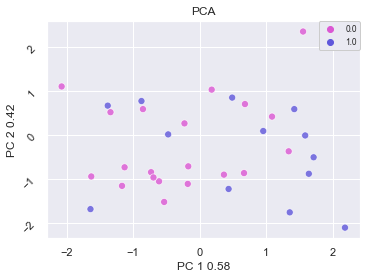

Results for AE: 

Best score for training data: 0.6307692307692306 

Best C: 0.08 



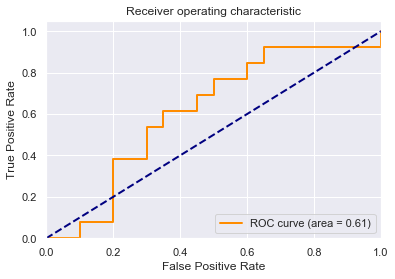

[[17  3]
 [12  1]]


              precision    recall  f1-score   support

           0       0.59      0.85      0.69        20
           1       0.25      0.08      0.12        13

    accuracy                           0.55        33
   macro avg       0.42      0.46      0.41        33
weighted avg       0.45      0.55      0.47        33

Training set score for Logistic Regression: 0.661538
Testing  set score for Logistic Regression: 0.545455
Best score for training data: 0.6153846153846153 

Best C: 1.0 

Best Gamma: 0.1 



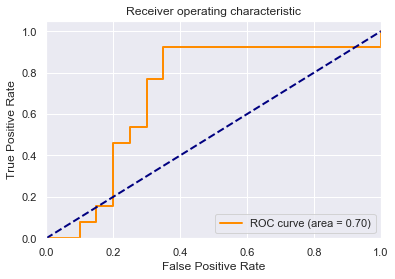

[[18  2]
 [12  1]]


              precision    recall  f1-score   support

           0       0.60      0.90      0.72        20
           1       0.33      0.08      0.12        13

    accuracy                           0.58        33
   macro avg       0.47      0.49      0.42        33
weighted avg       0.49      0.58      0.49        33

Training set score for SVM: 0.676923
Testing  set score for SVM: 0.575758
Best score for training data: 0.5615384615384615 

Best #estimators: 140 

Best max depth: None 



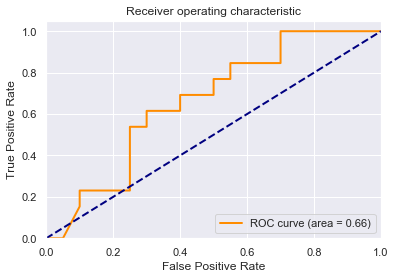

[[15  5]
 [ 8  5]]


              precision    recall  f1-score   support

           0       0.65      0.75      0.70        20
           1       0.50      0.38      0.43        13

    accuracy                           0.61        33
   macro avg       0.58      0.57      0.57        33
weighted avg       0.59      0.61      0.59        33

Training set score for RFC: 1.000000
Testing  set score for RFC: 0.606061
mutual information: 0.000209194501840825
AE 2 clusters -  silhoutte score: 0.3298646807670593
AE 3 clusters -  silhoutte score: 0.3314078748226166
AE 4 clusters -  silhoutte score: 0.3284651041030884
AE 5 clusters -  silhoutte score: 0.3145447373390198
AE 6 clusters -  silhoutte score: 0.28871750831604004


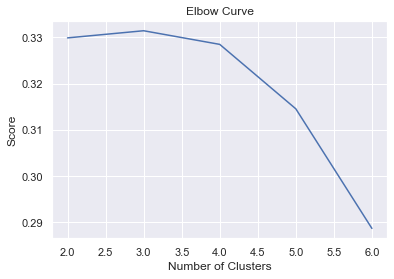

mutual information: 0.00591677351521856
AE 2 clusters -  silhoutte score: 0.3259654641151428
AE 3 clusters -  silhoutte score: 0.29780614376068115
AE 4 clusters -  silhoutte score: 0.30880796909332275
AE 5 clusters -  silhoutte score: 0.30329611897468567
AE 6 clusters -  silhoutte score: 0.2674065828323364


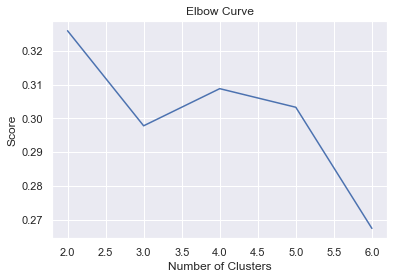

mutual information: 0.000209194501840825
AE 2 clusters -  silhoutte score: 0.32787981629371643
AE 3 clusters -  silhoutte score: 0.30976438522338867
AE 4 clusters -  silhoutte score: 0.32549822330474854
AE 5 clusters -  silhoutte score: 0.30089685320854187
AE 6 clusters -  silhoutte score: 0.3057386577129364


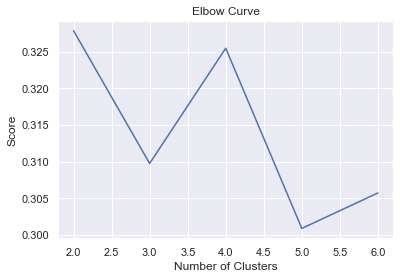

In [2]:
encoding_dims=[100]
mus=[0.5]
dropouts = [0.4]
l1s = [0.000001]
l2s = [0,0.00001,0.00003,0.00005,0.00007,0.0001,0.0002,0.0003]
scores = []
for encoding_dim in encoding_dims:
    for mu in mus:
        for dropout in dropouts:
            for l1 in l1s:
                for l2 in l2s:
                    ## Build and Train Autoencoder
                    autoencoder, encoder, decoder, loss = Models.build_and_train_autoencoder(X_train_concat,
                                                                                  X_train_concat,
                                                                                  encoding_dim=encoding_dim, 
                                                                                  regularizer=tf.keras.regularizers.l1_l2(l1,l2),
                                                                                  dropout=dropout,
                                                                                  epochs=200,
                                                                                  validation_data=(X_test_concat,X_test_concat))
                    ## Encode datasets
                    X_latent_ae = Models.encode_dataset(X_train_concat, encoder)
                    X_latent_test_ae = Models.encode_dataset(X_test_concat, encoder)

                    ## PCA ON AUTOENCODER LATENT SPACE
                    X_latent_pca_ae, X_latent_test_pca_ae = Models.perform_PCA(X_latent_ae, X_latent_test_ae, y_train, y_test, n_components=10)

                    ### CLASSIFICATION ###
                    classify = Models.classify(X_latent_ae, X_latent_test_ae, np.ravel(y_train), np.ravel(y_test), model_type="AE")

                    ### CLUSTERING ###
                    clustering = Models.cluster(X_latent_ae,np.ravel(y_train), model_type="AE")

                    scores.append([mu,dropout,l1,l2,loss] + classify + clustering)


In [3]:
scores = pd.DataFrame(scores,
                      columns=["mu","dropout","l1","l2","loss","LR accuracy","SVM accuracy", "RF accuracy", "LR ROC-AUC", "SVM ROC-AUC", "RF ROC-AUC","KMeans Silhouette","Spectral Silhouette","Hierarchical Silhouette","KMeans MI","Spectral MI","Hierarchical MI"])    
scores

mu  dropout        l1       l2      loss  LR accuracy  SVM accuracy  \
0  0.5      0.4  0.000001  0.00000  0.037361     0.545455      0.545455   
1  0.5      0.4  0.000001  0.00001  0.040513     0.666667      0.636364   
2  0.5      0.4  0.000001  0.00003  0.030611     0.636364      0.606061   
3  0.5      0.4  0.000001  0.00005  0.034966     0.606061      0.545455   
4  0.5      0.4  0.000001  0.00007  0.036733     0.545455      0.575758   
5  0.5      0.4  0.000001  0.00010  0.034529     0.636364      0.606061   
6  0.5      0.4  0.000001  0.00020  0.025542     0.575758      0.575758   
7  0.5      0.4  0.000001  0.00030  0.029202     0.545455      0.575758   

   RF accuracy  LR ROC-AUC  SVM ROC-AUC  RF ROC-AUC  KMeans Silhouette  \
0     0.636364    0.523077     0.546154    0.482692           0.200788   
1     0.606061    0.496154     0.515385    0.523077           0.273772   
2     0.515152    0.592308     0.646154    0.536538           0.220918   
3     0.606061    0.607692     0.569231    0.553846           0.273215   
4     0.545455    0.538462     0.542308    0.461538           0.282185   
5     0.606061    0.588462     0.553846    0.632692           0.343353   
6     0.575758    0.653846     0.684615    0.719231           0.286909   
7     0.606061    0.611538     0.700000    0.661538           0.329865   

   Spectral Silhouette  Hierarchical Silhouette  KMeans MI  Spectral MI  \
0             0.228999                 0.202190   0.020139     0.000310   
1             0.269350                 0.214477   0.015473     0.007832   
2             0.218029                 0.215777   0.003729     0.000061   
3             0.256686                 0.273215   0.007056     0.003010   
4             0.281109                 0.259356   0.003729     0.002607   
5             0.343353                 0.327823   0.014883     0.014883   
6             0.290588                 0.280988   0.000101     0.000798   
7             0.325965                 0.327880   0.000209     0.005917   

   Hierarchical MI  
0         0.027083  
1         0.003674  
2         0.002741  
3         0.007056  
4         0.000021  
5         0.026656  
6         0.000215  
7         0.000209

### Results

| dim | mu  | l1      | l2       | Dropout | Loss   | Accuracy (LR) | Accuracy (SVM) | Accuracy (RF) | ROC-AUC (LR) | ROC-AUC (SVM) | ROC-AUC (RF) | SS (K-means) | SS (Spectral)| SS (Hierarch.)| MI (K-means)  | MI (Spectral)  | MI (Hierarch.) |
|-----|-----|---------|----------|---------|--------|---------------|----------------|---------------|--------------|---------------|--------------|--------------|--------------|---------------|---------------|----------------|----------------|
| 100 | 0.5 |0.0000005|0.00000001| 0.40    | 0.0365 |  0.60         | 0.57           | 0.66          | 0.5615       | 0.5038        | 0.6615       | 0.23         | 0.25         | 0.22          | 0.0032        | 0.0003         | 0.0002         |
| 100 | 0.5 |0.0000005|0.00000001| 0.10    | 0.0279 |  0.60         | 0.54           | 0.63          | 0.5076       | 0.5961        | 0.5134       | 0.16         | 0.18         | 0.13          | 0.0203        | 0.0017         | 0.0452         |
| 100 | 0.5 |0.000005 |0.00000001| 0.40    | 0.0404 |  0.60         | 0.66           | 0.54          | 0.6115       | 0.5884        | 0.5269       | 0.28         | 0.28         | 0.26          | 0.0267        | 0.0309         | 0.0137         |
| 100 | 0.5 |0.000001 |0.00000001| 0.40    | 0.0435 |  0.66         | 0.66           | 0.69          | 0.5038       | 0.4730        | 0.4846       | 0.30         | 0.30         | 0.28          | 0.0266        | 0.0349         | 0.0349         |
| 100 | 0.5 |0.0001   |0.00000001| 0.40    | 0.0279 |  0.63         | 0.60           | 0.63          | 0.6519       | 0.5250        | 0.4980       | 0.56         | 0.56         | 0.55          | 0.0378        | 0.0378         | 0.0425         |
| 100 | 0.5 |0.000001 |0         | 0.40    | 0.0351 |  0.69         | 0.63           | 0.60          | 0.6115       | 0.5730        | 0.5173       | 0.23         | 0.25         | 0.19          | 0.0217        | 0.0002         | 0.0084         |

C:\Users\Tomas\Anaconda3\envs\tensorflow_2\lib\site-packages\pandas\core\indexing.py:376: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\Tomas\Anaconda3\envs\tensorflow_2\lib\site-packages\pandas\core\indexing.py:381: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(new_indexer, value)
C:\Users\Tomas\Anaconda3\envs\tensorflow_2\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the docume

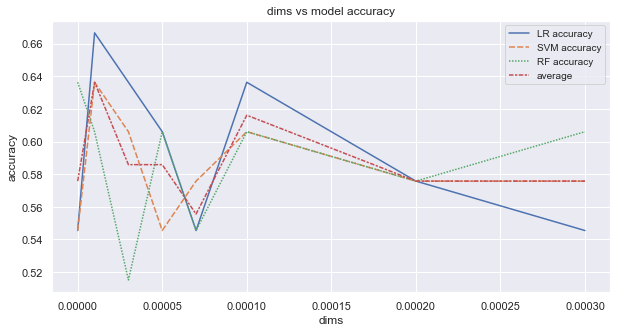

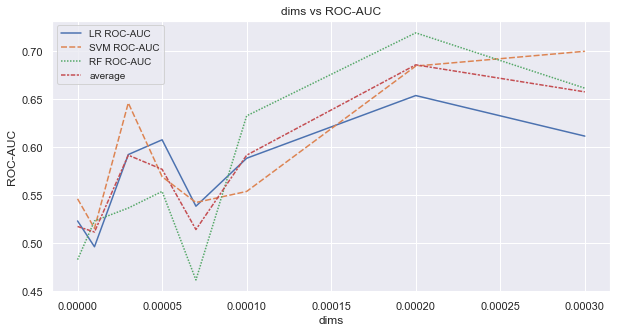

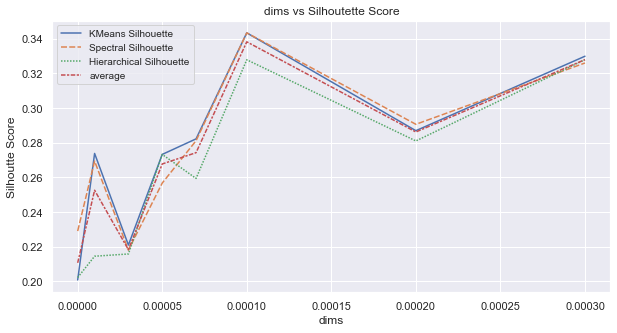

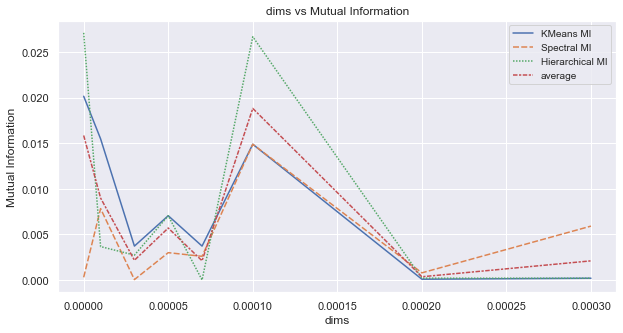

In [4]:
scores.index = l2s

data_acc = scores[["LR accuracy","SVM accuracy","RF accuracy"]]
data_acc.loc[:,"average"] = data_acc.mean(axis=1)

data_auc = scores[["LR ROC-AUC", "SVM ROC-AUC", "RF ROC-AUC"]]
data_auc.loc[:,"average"] = data_auc.mean(axis=1)

data_ss = scores[["KMeans Silhouette","Spectral Silhouette","Hierarchical Silhouette"]]
data_ss.loc[:,"average"] = data_ss.mean(axis=1)

data_mi = scores[["KMeans MI","Spectral MI","Hierarchical MI"]]
data_mi.loc[:,"average"] = data_mi.mean(axis=1)

sns.set()
hyperparam = "dims"

ax = sns.lineplot(data=data_acc)
plt.legend(fontsize='small')
ax.set_xlabel(hyperparam)
ax.set_ylabel(f"accuracy")
ax.figure.set_size_inches(10 , 5)
ax.set_title(f"{hyperparam} vs model accuracy")
plt.show()

ax = sns.lineplot(data=data_auc)
plt.legend(fontsize='small')
ax.set_xlabel(hyperparam)
ax.set_ylabel(f"ROC-AUC")
ax.figure.set_size_inches(10 , 5)
ax.set_title(f"{hyperparam} vs ROC-AUC")
plt.show()

ax = sns.lineplot(data=data_ss)
plt.legend(fontsize='small')
ax.set_xlabel(hyperparam)
ax.set_ylabel(f"Silhoutte Score")
ax.figure.set_size_inches(10 , 5)
ax.set_title(f"{hyperparam} vs Silhoutette Score")
plt.show()

ax = sns.lineplot(data=data_mi)
plt.legend(fontsize='small')
ax.set_xlabel(hyperparam)
ax.set_ylabel(f"Mutual Information")
ax.figure.set_size_inches(10 , 5)
ax.set_title(f"{hyperparam} vs Mutual Information")
plt.show()

mutual information: 0.000209194501840825


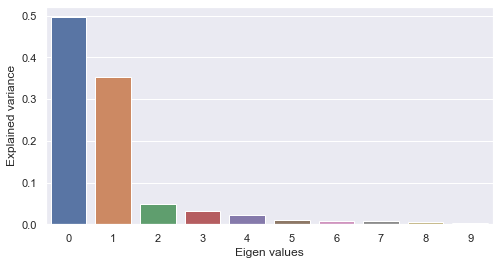

PCA on single-modal explained variance ratio: 0.9881488680839539


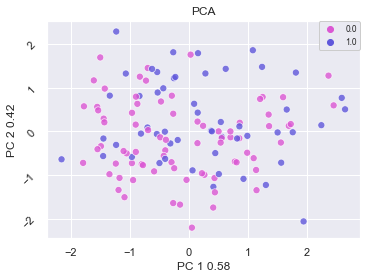

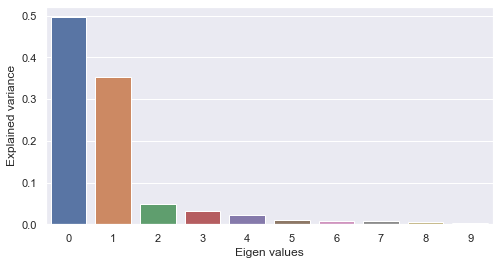

PCA on single-modal explained variance ratio: 0.9881488680839539


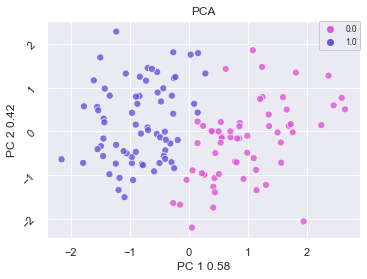

AE 2 clusters -  silhoutte score: 0.3298646807670593
AE 3 clusters -  silhoutte score: 0.3314078748226166
AE 4 clusters -  silhoutte score: 0.3284651041030884
AE 5 clusters -  silhoutte score: 0.3145447373390198
AE 6 clusters -  silhoutte score: 0.28871750831604004


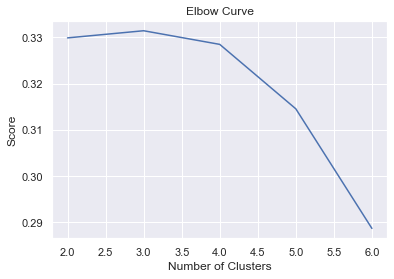

ValueError: labels_true must be 1D: shape is (130, 1)

In [25]:
clustering = Models.cluster(X_latent_ae,y_train, model_type="AE")